In [ ]:
#Important Libraries
import pandas as pd #To read excel dataset
from yellowbrick.cluster import KElbowVisualizer #Find optimul number of clusters
from sklearn.cluster import KMeans #Clustering K-means
from sklearn.preprocessing import StandardScaler #standartization
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder #One-Hot Encoding method

from sklearn.compose import ColumnTransformer #Let us to formalize our preprocessing for numerical and categorical values
import seaborn as sns #Plotting library

import numpy as np #numpy
import matplotlib.pyplot as plt #ploting library
%matplotlib inline

In [ ]:
data = pd.read_excel("Retailstore_data.xlsx")

In [ ]:
data = data.drop(["Country","Postal Code"],axis=1)

In [ ]:
data['unit_price'] = data["Sales"]/data["Quantity"]

In [ ]:
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,unit_price
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840


# Clustering

In [ ]:
data_to_cluster = data[['Segment','State','Sub-Category','unit_price','Quantity','Discount','Profit ']]

In [ ]:
final_cat = data_to_cluster.select_dtypes(include=['object']).columns.tolist()
final_num = data_to_cluster.select_dtypes(exclude=['object']).columns.tolist()
#Scaling
full_pipeline = ColumnTransformer([
("num", StandardScaler(), final_num),
("cat", OneHotEncoder(handle_unknown = 'ignore'), final_cat)])

data_to_cluster = full_pipeline.fit_transform(data_to_cluster)

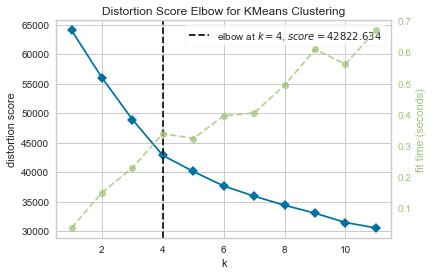

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data_to_cluster)
visualizer.show()

In [ ]:
num_clusters = 4
k_means = KMeans(n_clusters=num_clusters, init='k-means++',random_state=0).fit(data_to_cluster)
labels = k_means.labels_
data['label'] = labels

In [ ]:
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,unit_price,label
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800,1
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800,1
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100,1
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155,3
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840,1


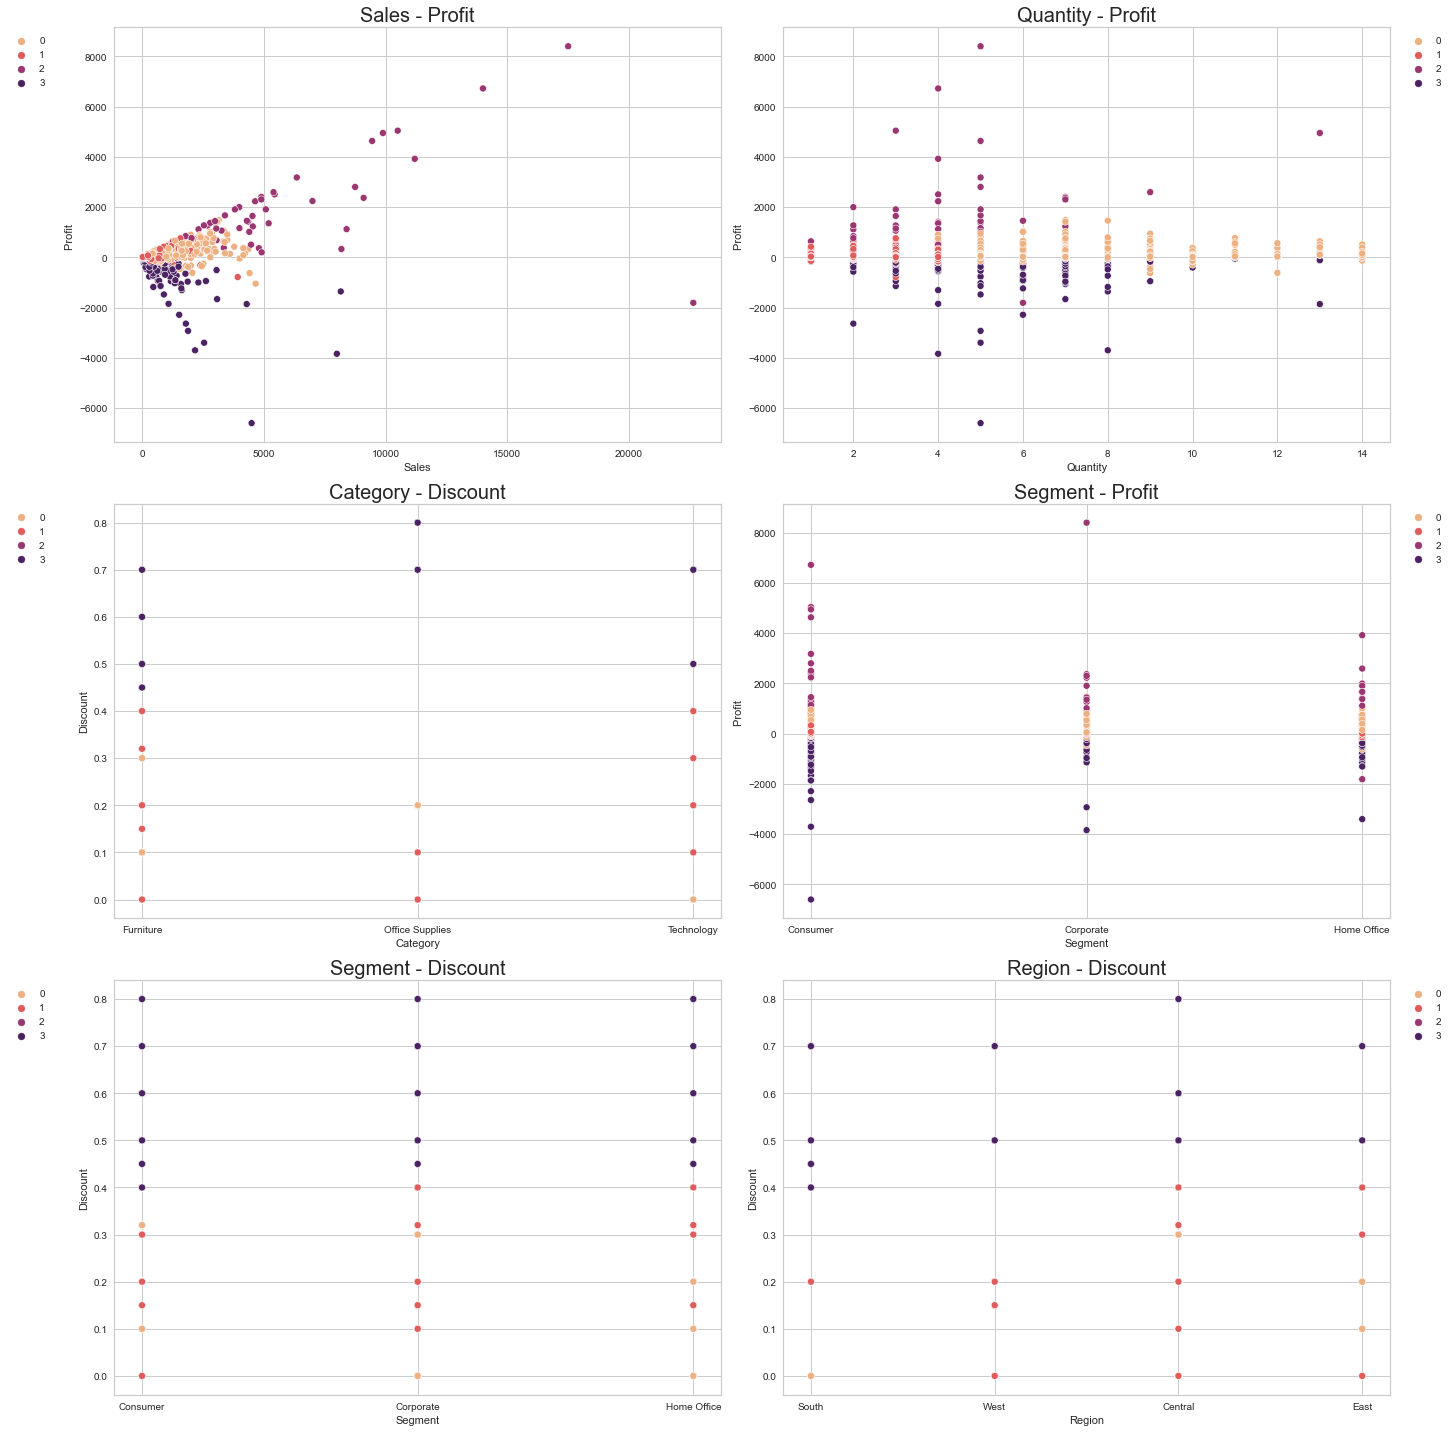

In [ ]:
pallete = sns.color_palette("flare", as_cmap=True)

fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize=(20,20));
sns.scatterplot(x = data['Sales'], y = data['Profit '], hue=data['label'], ax = axs[0][0], palette = pallete)
plt.legend(data['label'],bbox_to_anchor=(1, 0.5))


sns.scatterplot(x = data['Quantity'],y = data['Profit '], hue=data['label'], ax = axs[0][1], palette = pallete)
plt.legend(data['label'],bbox_to_anchor=(1, 0.5))


sns.scatterplot(x = data['Category'],y = data['Discount'], hue=data['label'], ax = axs[1][0], palette = pallete)
plt.legend(data['label'],bbox_to_anchor=(1, 0.5))

sns.scatterplot(x = data['Segment'],y = data['Profit '], hue=data['label'],ax = axs[1][1], palette = pallete )
plt.legend(data['label'],bbox_to_anchor=(1, 0.5))


sns.scatterplot(x = data['Segment'],y= data['Discount'], hue=data['label'],ax = axs[2][0], palette = pallete )
plt.legend(data['label'],bbox_to_anchor=(1, 0.5))

sns.scatterplot(x = data['Region'],y= data['Discount'], hue=data['label'],ax = axs[2][1], palette = pallete )
plt.legend(data['label'],bbox_to_anchor=(1, 0.5))


axs[0][0].set_title('Sales - Profit', fontsize = 20)
axs[0][1].set_title('Quantity - Profit', fontsize = 20)
axs[1][0].set_title('Category - Discount', fontsize = 20)
axs[1][1].set_title('Segment - Profit', fontsize = 20)
axs[2][0].set_title('Segment - Discount', fontsize = 20)
axs[2][1].set_title('Region - Discount', fontsize = 20)

axs[0][0].legend(loc='best', bbox_to_anchor=(-0.1,1))
axs[0][1].legend(loc='best', bbox_to_anchor=(1.1,1))

axs[1][0].legend(loc='best', bbox_to_anchor=(-0.1,1))
axs[1][1].legend(loc='best', bbox_to_anchor=(1.1,1))

axs[2][0].legend(loc='best', bbox_to_anchor=(-0.1,1))
axs[2][1].legend(loc='best', bbox_to_anchor=(1.1,1))



plt.tight_layout()

# Clusters

## Cluster 1

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit '}>],
       [<AxesSubplot:title={'center':'unit_price'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

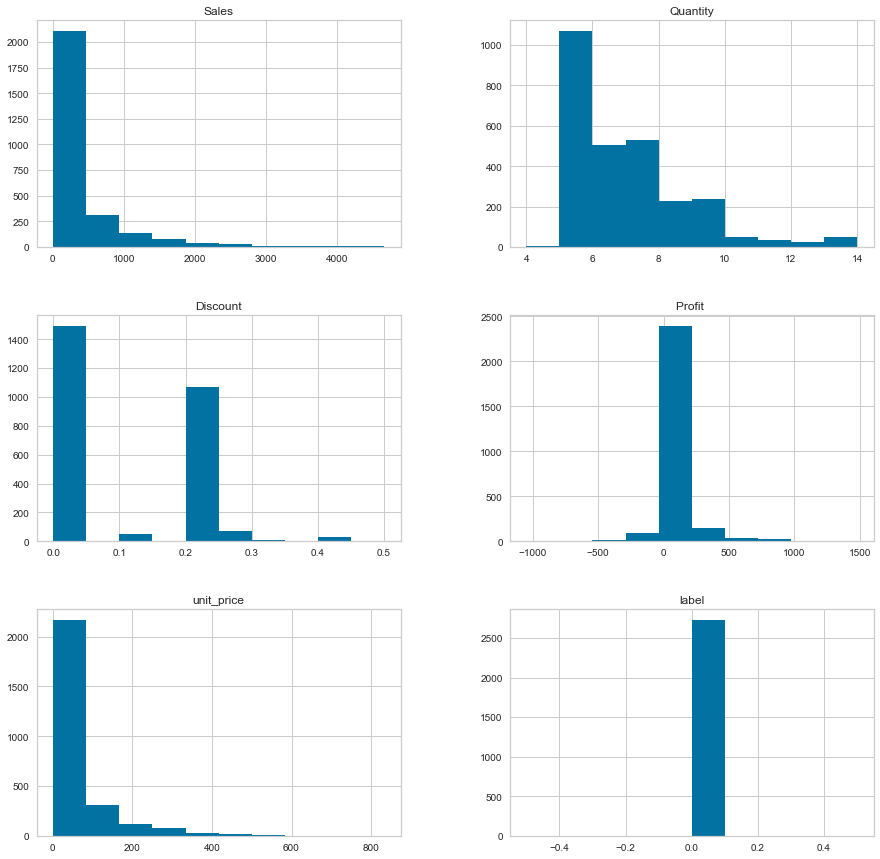

In [ ]:
data[data['label']==0].hist(figsize=(15,15))

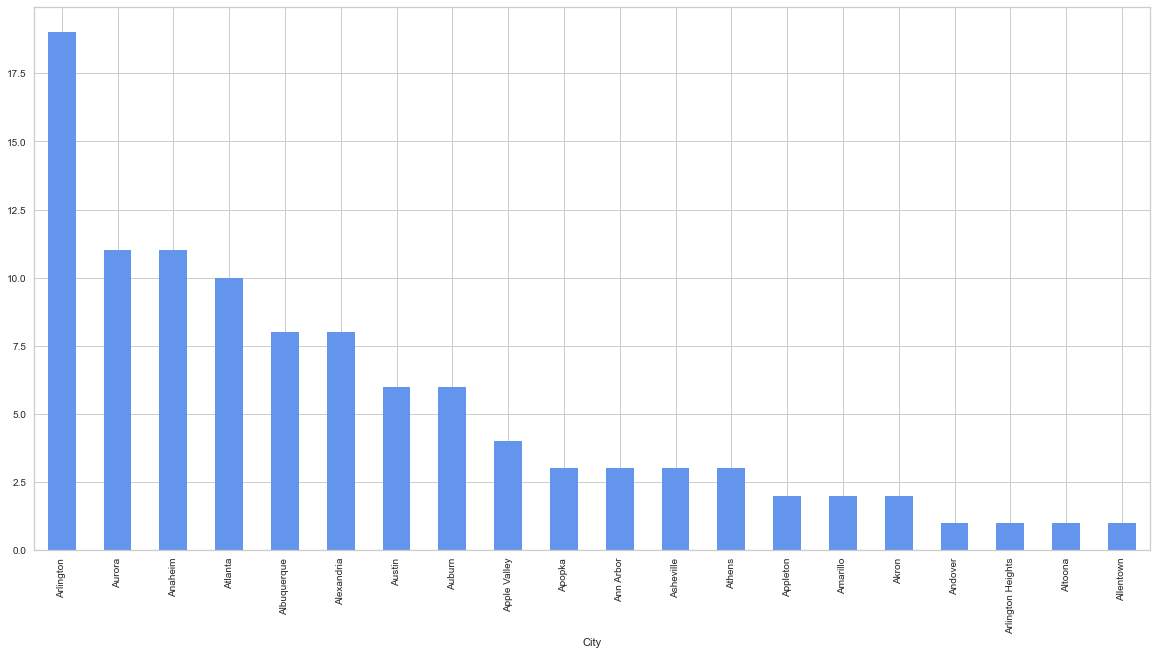

In [ ]:
df_state_sales = data[data['label']==0].groupby('City')['City'].count().head(20).sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

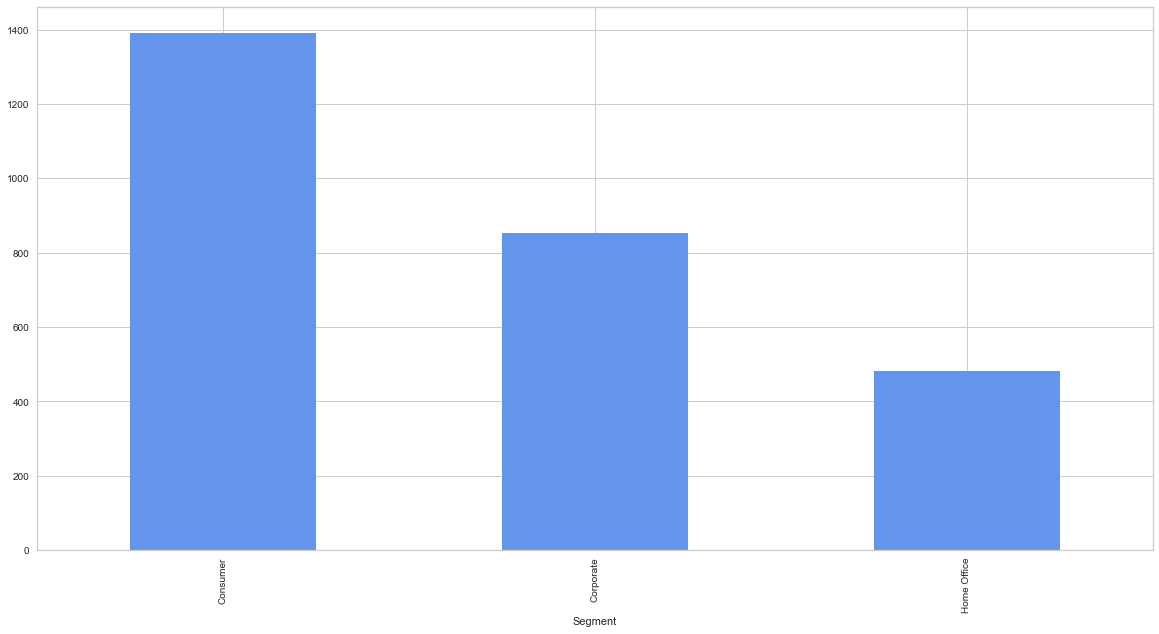

In [ ]:
df_state_sales = data[data['label']==0].groupby('Segment')['Segment'].count().sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

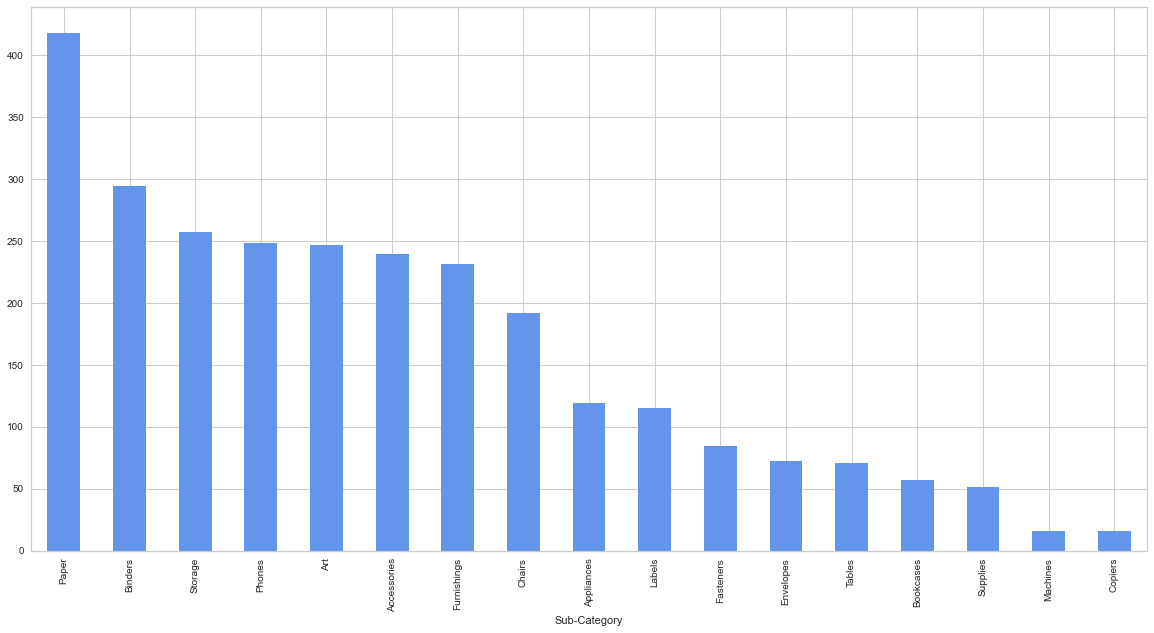

In [ ]:
df_state_sales = data[data['label']==0].groupby('Sub-Category')['Sub-Category'].count().sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

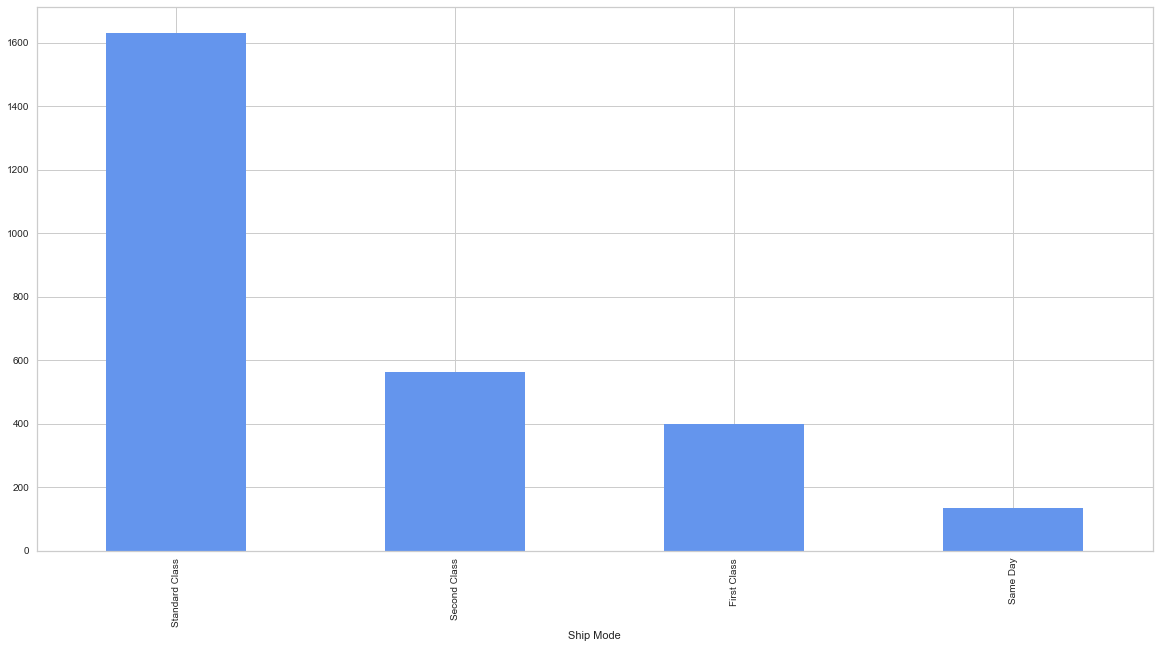

In [ ]:
df_state_sales = data[data['label']==0].groupby('Ship Mode')['Ship Mode'].count().sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

## Cluster 2

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit '}>],
       [<AxesSubplot:title={'center':'unit_price'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

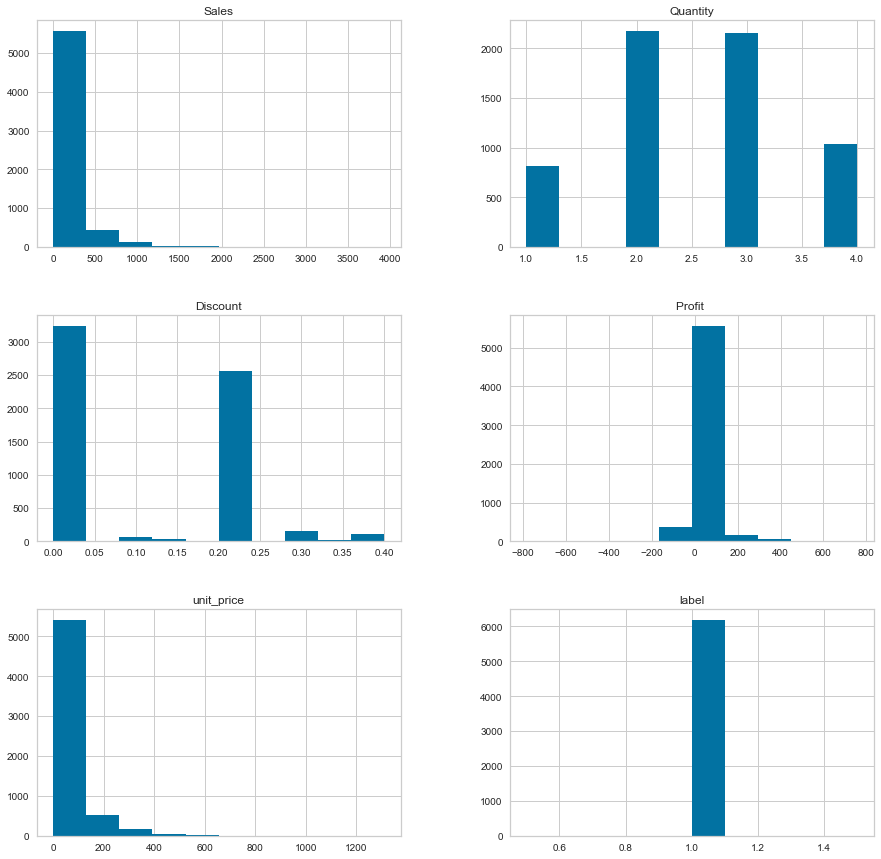

In [ ]:
data[data['label']==1].hist(figsize=(15,15))

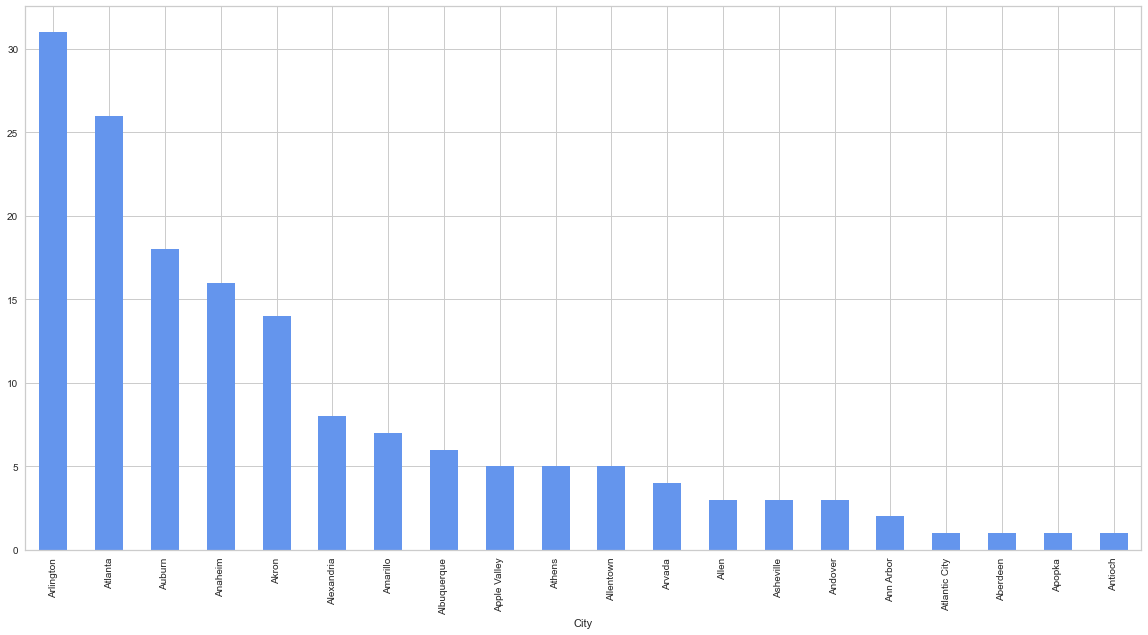

In [ ]:
df_state_sales = data[data['label']==1].groupby('City')['City'].count().head(20).sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

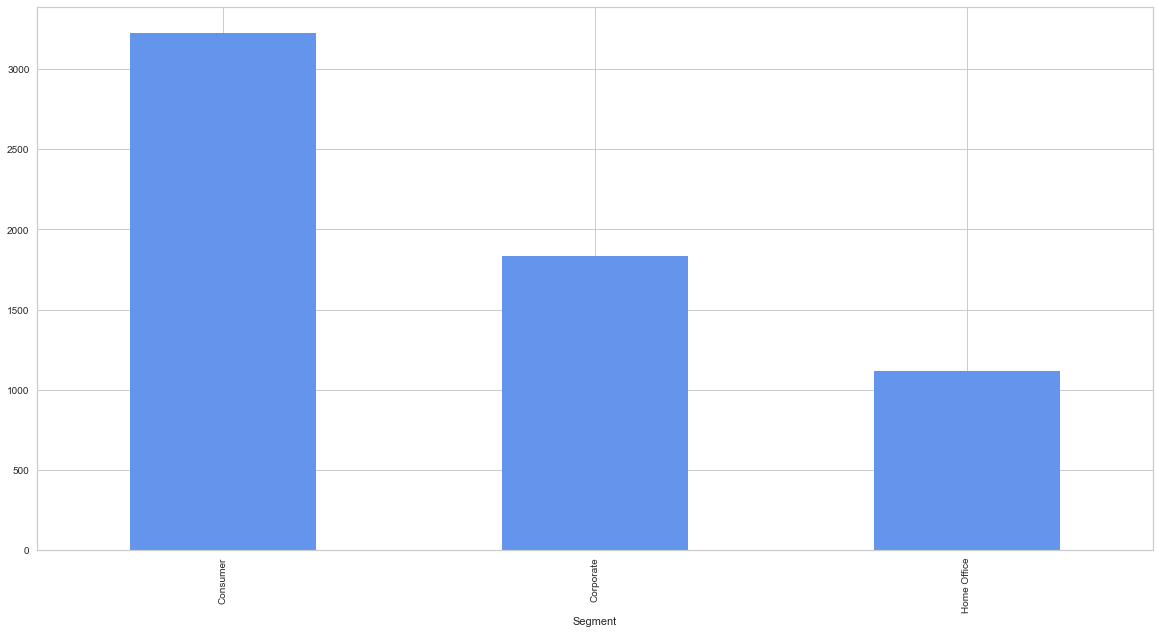

In [ ]:
df_state_sales = data[data['label']==1].groupby('Segment')['Segment'].count().sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

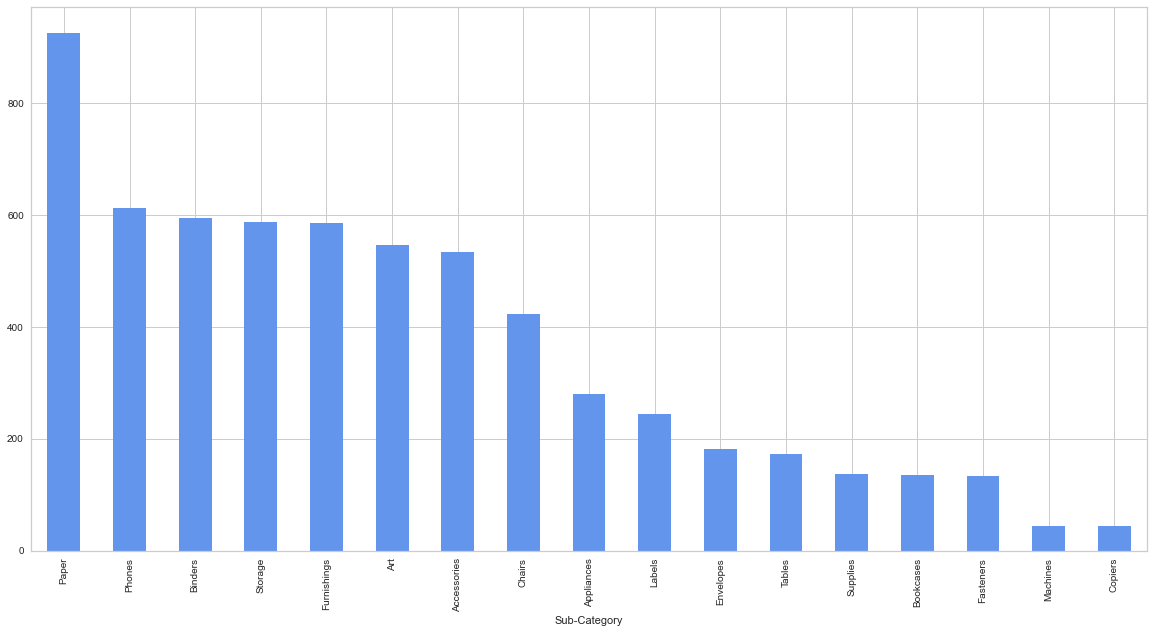

In [ ]:
df_state_sales = data[data['label']==1].groupby('Sub-Category')['Sub-Category'].count().sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

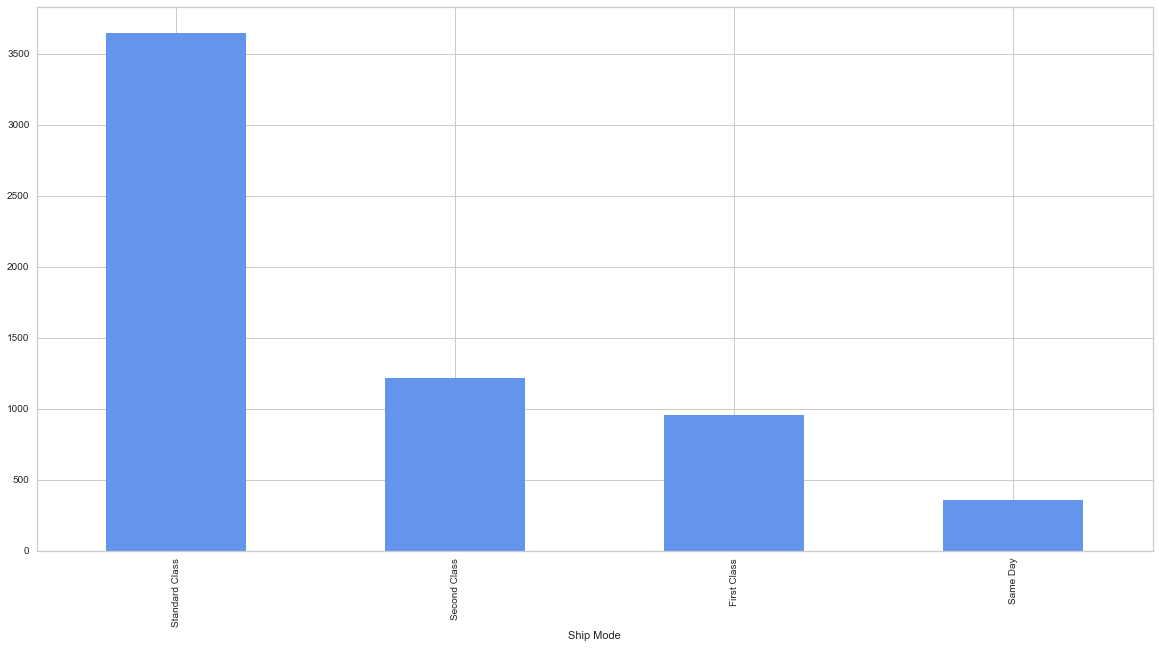

In [ ]:
df_state_sales = data[data['label']==1].groupby('Ship Mode')['Ship Mode'].count().sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

## Cluster 3

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit '}>],
       [<AxesSubplot:title={'center':'unit_price'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

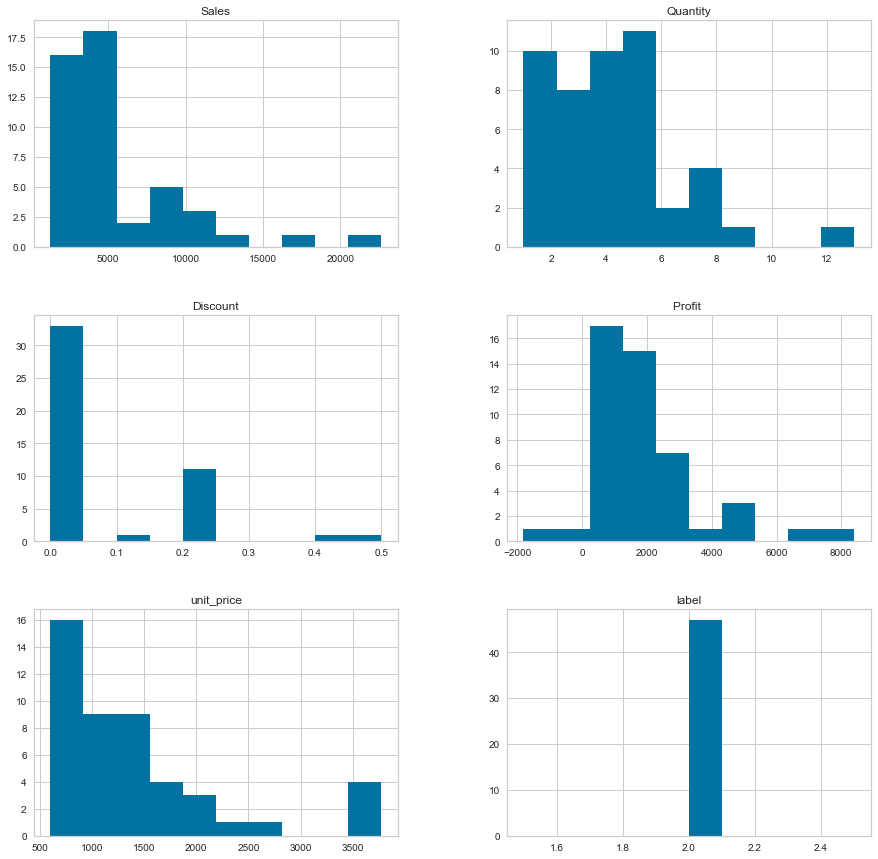

In [ ]:
data[data['label']==2].hist(figsize=(15,15))

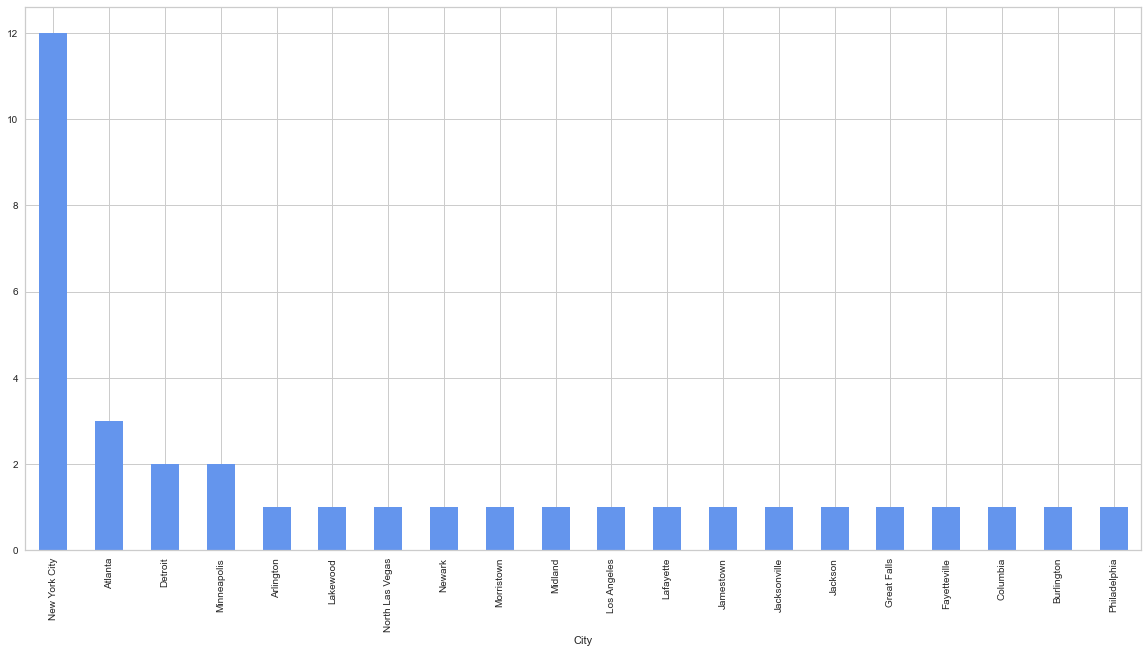

In [ ]:
df_state_sales = data[data['label']==2].groupby('City')['City'].count().head(20).sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

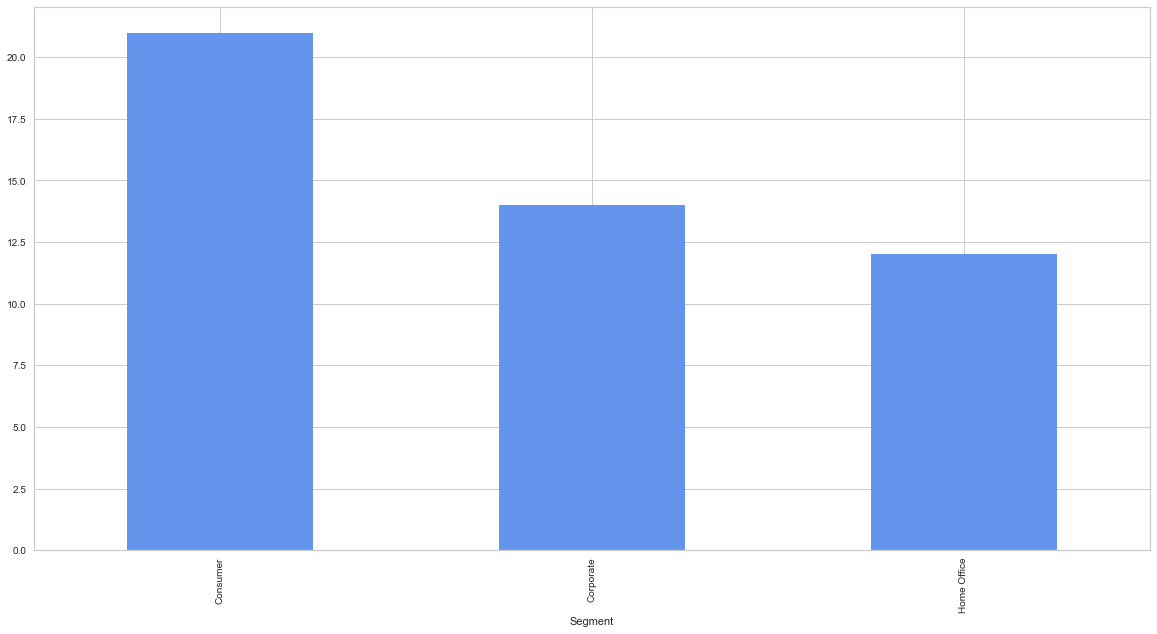

In [ ]:
df_state_sales = data[data['label']==2].groupby('Segment')['Segment'].count().sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

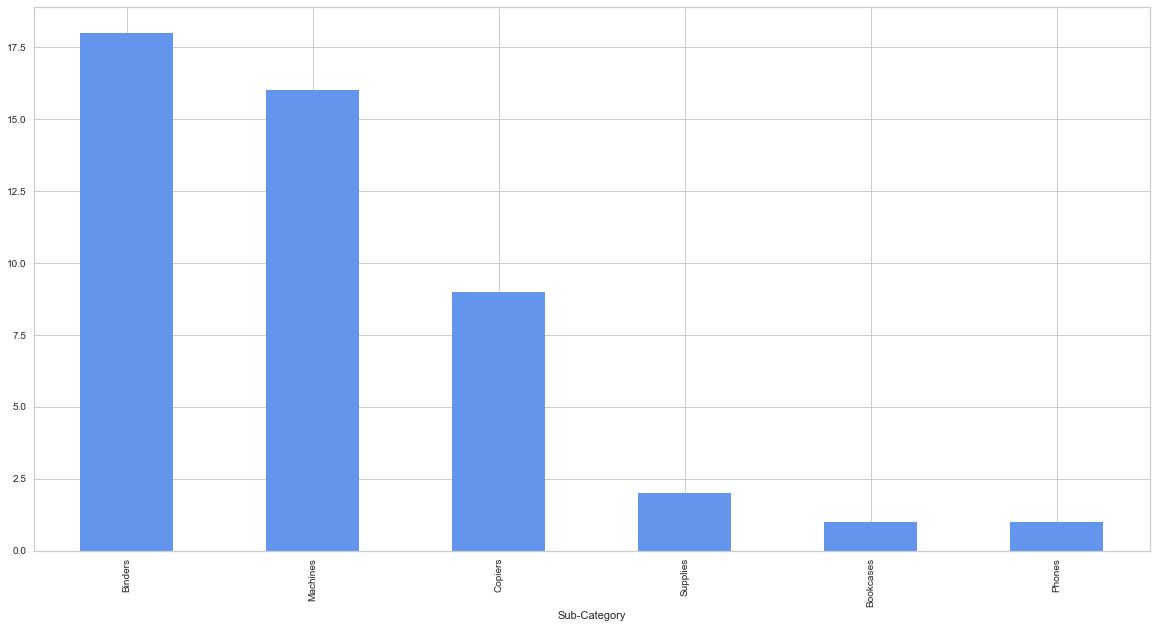

In [ ]:
df_state_sales = data[data['label']==2].groupby('Sub-Category')['Sub-Category'].count().sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

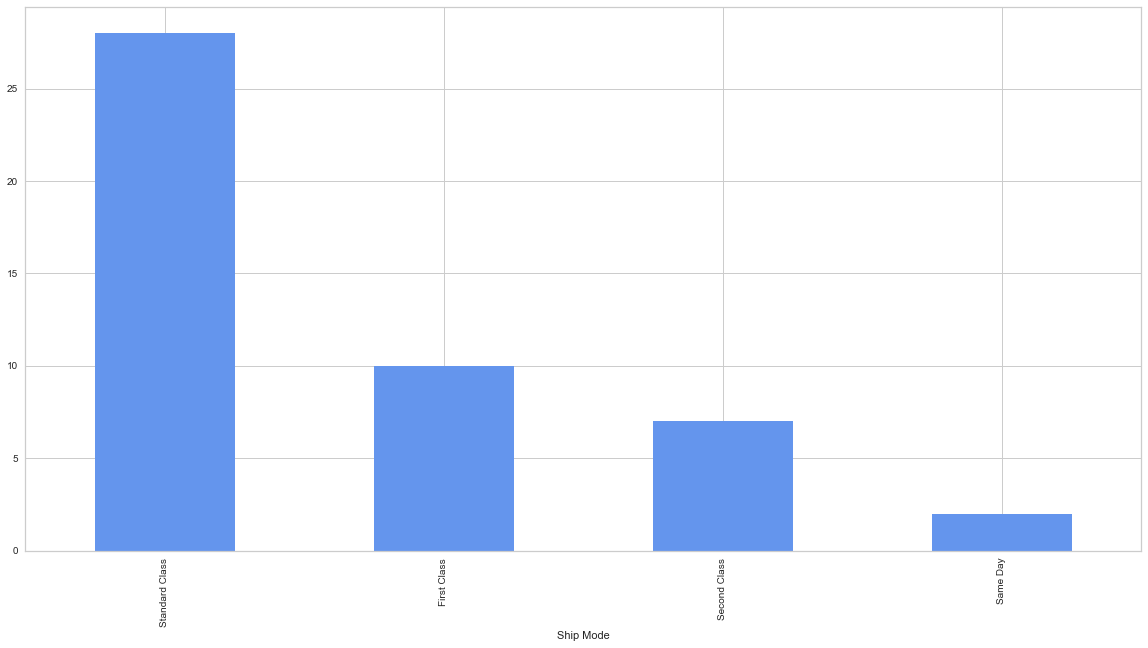

In [ ]:
df_state_sales = data[data['label']==2].groupby('Ship Mode')['Ship Mode'].count().sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

## Cluster 4

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit '}>],
       [<AxesSubplot:title={'center':'unit_price'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

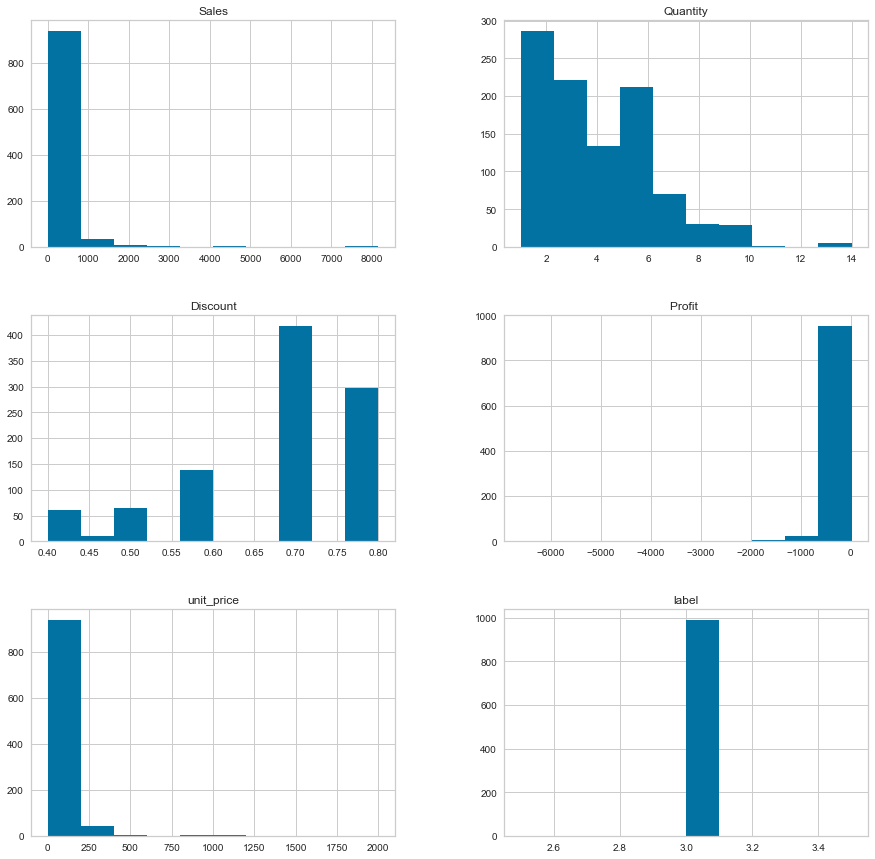

In [ ]:
data[data['label']==3].hist(figsize=(15,15))

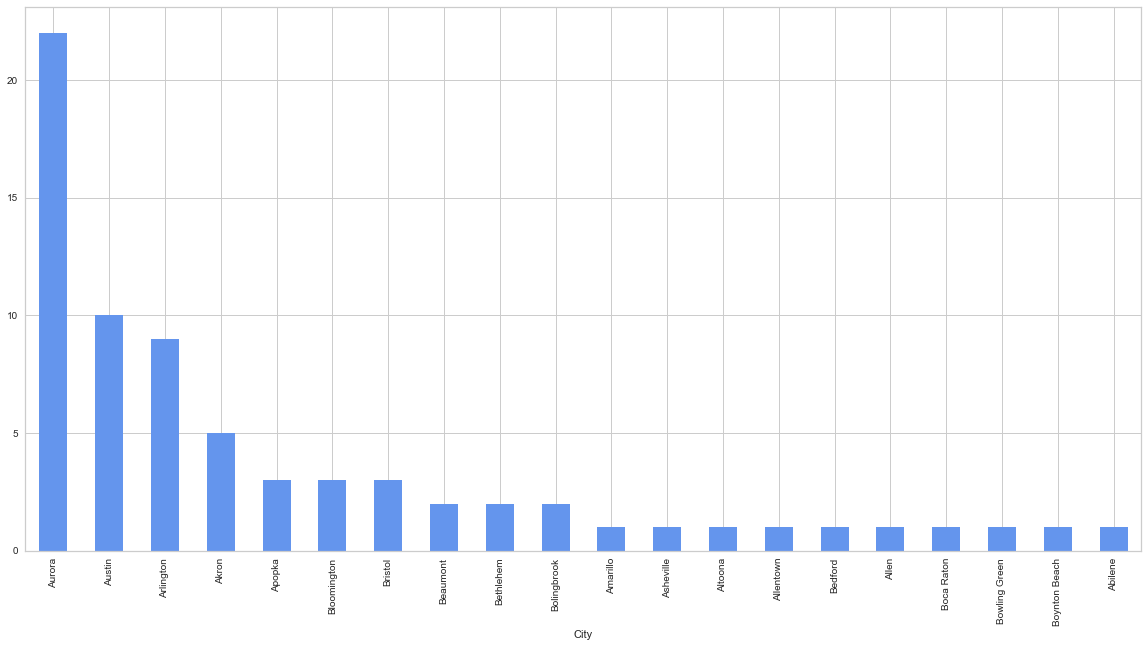

In [ ]:
df_state_sales = data[data['label']==3].groupby('City')['City'].count().head(20).sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

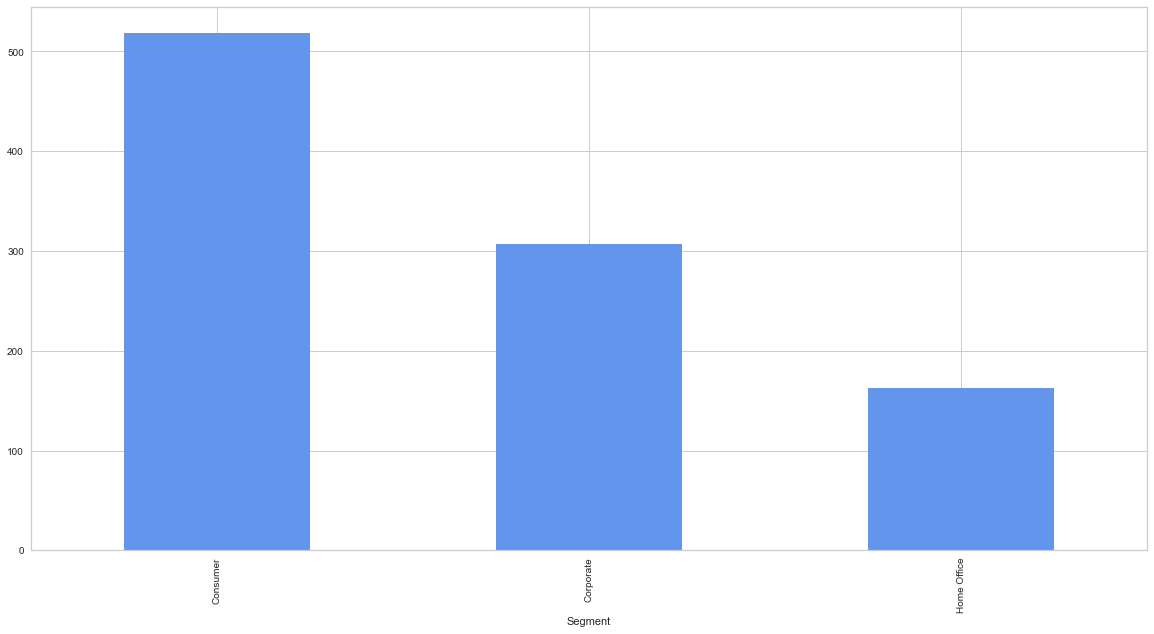

In [ ]:
df_state_sales = data[data['label']==3].groupby('Segment')['Segment'].count().sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

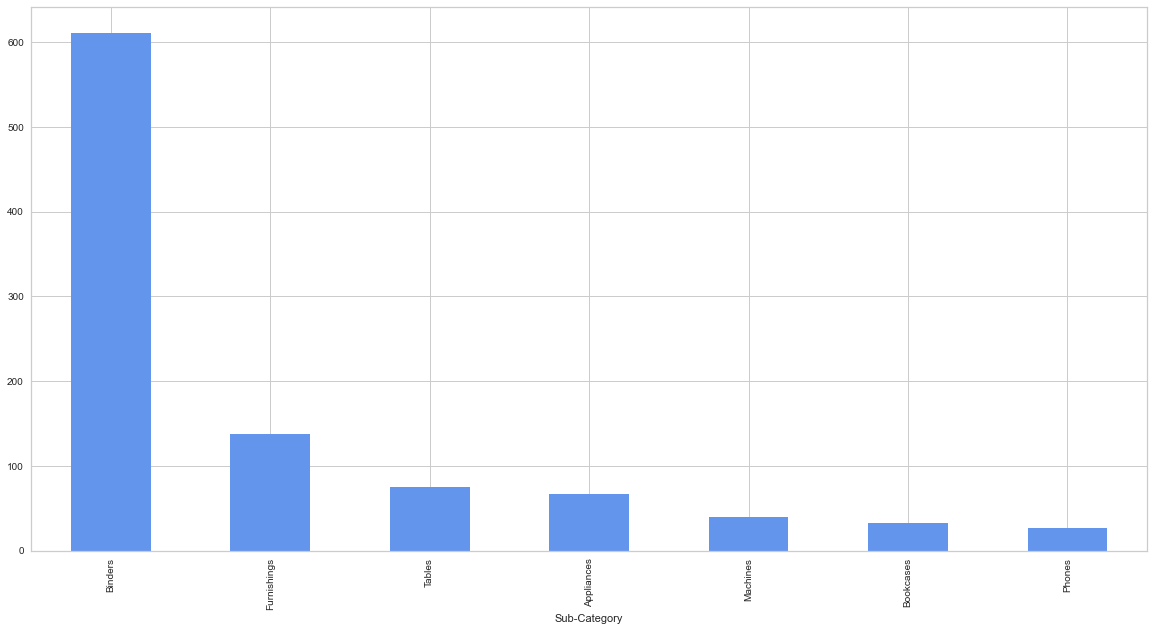

In [ ]:
df_state_sales = data[data['label']==3].groupby('Sub-Category')['Sub-Category'].count().sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

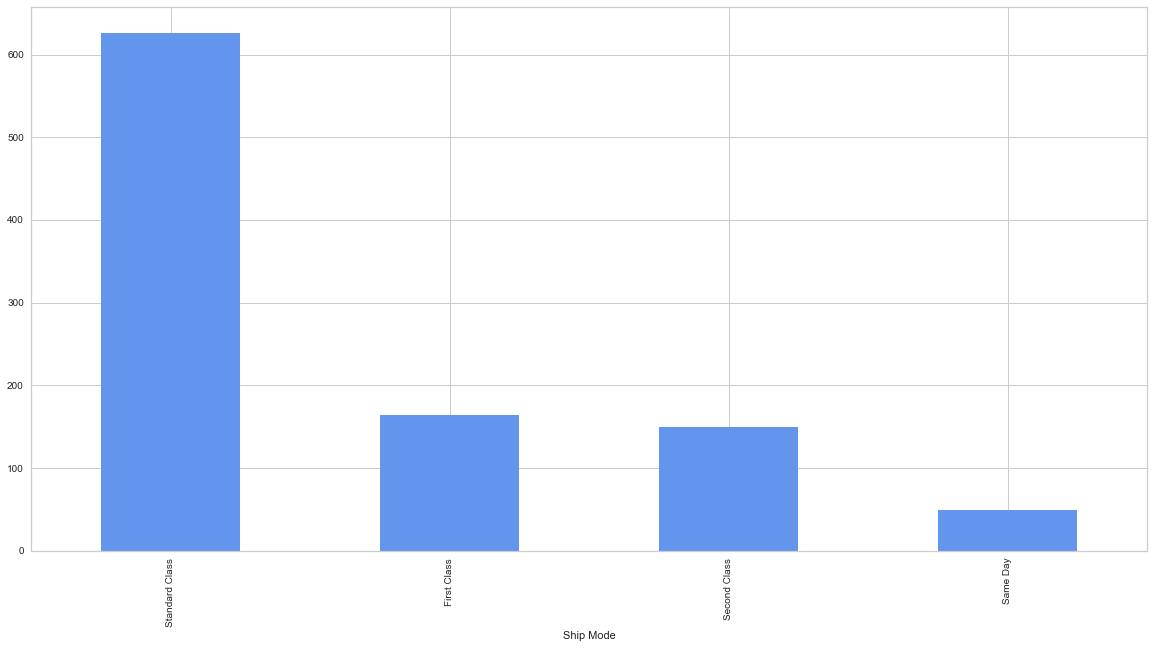

In [ ]:
df_state_sales = data[data['label']==3].groupby('Ship Mode')['Ship Mode'].count().sort_values(ascending = False).plot.bar(figsize = (20, 10),
                                                                                            color = 'Cornflowerblue')
plt.show()

# Summary Clustering

Cluster 1 has low sales values, with most orders between the range of  0 - 250. The majority of orders contain 1 - 3 items, and the discounts offered are low, with most items not having any discount. The profit margins in Cluster 1 are mostly positive, although there are a few items that have negative profit margins. This cluster contains mainly consumer and corporate customers, with home office customers being the least frequent. The items with the highest sale volume in Cluster 1 are office supplies such as paper, binders, and storage products. These products are items that both individuals and corporate customers use on a daily basis. The shipping methods used in this cluster are mostly standard and second-class.

Cluster 2 shows a high number of sales in the 0 − 400 range, and the quantities of items ordered are generally between 1 and 4. The distribution of discounts in Cluster 2 varies between 20% - 40% and some items have no discount at all. Unit prices range from 0 - 120, and most profit margins are per sale positive, although there are more negative profit sales compared to cluster 1. Most of sales in this cluster are for consumers, followed by corporate and home office customers. Popular items include office supplies like paper, binders, and storage, with fewer sales of the big and expensive items like machines and copiers. Standard-class shipping is most common in this cluster, followed by second-class, first-class, and same-day shipping.

Cluster 3 is distinct due to its lower number of sales but significantly higher sales values, with multiple orders exceeding 3500. Most orders in this cluster have smaller quantities, between 1 and 5 items,and the majority of items have no discount associated with them. There are only a handful of negative profit margins in Cluster 3, with most being relatively high. This cluster caters to a more specialised or premium market segment,as indicated by the unit prices ranging from 300 - $3800. New York City dominates this cluster in terms of sales, suggesting a higher demand for high-priced products or a larger customer base with the finances to afford high-priced items. Cluster 3 contains a balanced mix of consumer, corporate, and home office customers, with a focus on high-value items like machines and copiers. Standard-class shipping is the most commonly used shipping method, followed by first-class, second-class, and same-day shipping.

The sales in Cluster 4 are lower than Clusters 1 and 2, but higher than Cluster 3. This cluster targets customers who are looking to buy heavily discounted  items with discounts ranging from 40% to 80%. However, the profit margins for all items are negative, affecting the overall business performance. orders in Cluster 4 range from 0 - 900, with order quantities varying from 1 to 10 items. The majority of unit prices are between 0 - 230. The customers in this cluster are primarily consumers, followed by corporate and home office customers. Popular items include binders, furnishings, and tables, and standard-class shipping is the most commonly used shipping method.

Upon analysing all four clusters in more detail, several key observations and insights can be drawn:

Clusters 1 and 2 cater to a larger customer base with low to moderate sales values and a primary focus on office supplies. These clusters target both individual and business customers, providing a diverse range of products that meet the needs of various customer segments. Clusters 1 and
2 seem to serve the essential and common needs of most customers, and both clusters generate positive profit margins. The key differences between the two clusters lie in the diversity of discounts and the slight variation in customer types.

Cluster 3 is characterised by high-value orders and premium products. The sales in this cluster are more specialised and cater to a smaller but wealthier customer base, predominantly located in New York City. The higher unit prices and profit margins in this cluster suggest a successful strategy for targeting customers with more specific and high-end demands. Ensuring that the small number of negative profit sales are addressed could further optimise the cluster's performance.

Cluster 4 faces significant challenges due to its negative profit margins on all items. This cluster is centred around discounted products, targeting customers who only buy discounted items. While offering deep discounts might drive sales, it is essential to re-evaluate the discount strategy to ensure profitability. Shifting the focus towards more profitable products or adjusting the discounts might improve the financial performance of this cluster.
The analysis of the four clusters highlights the diversity of customer segments and product preferences in the market. While Clusters 1 and 2 have a strong presence in the market, Cluster 3's niche emphasis may result in lower profits. The company should re-evaluate its discount strategy to help maximise profits across all clusters.


# Data Analysys

## Discount - graph

### General Discount Lose

/Users/yury/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


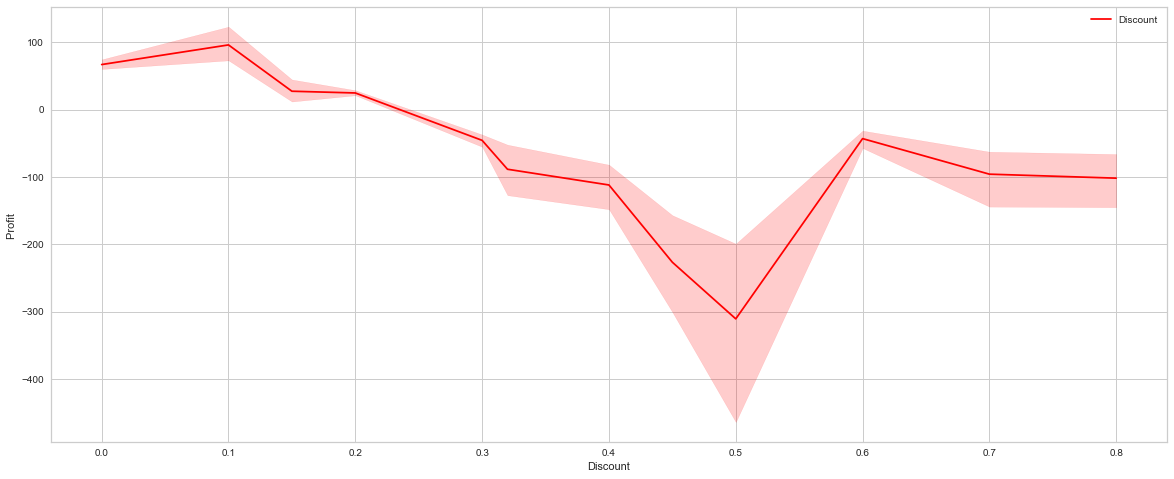

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot('Discount','Profit ', data=data , color='red',label='Discount')
plt.legend()
plt.show()

**Summary**

In general, It can be seen that company lossing proft if they use discount more than 25%, thus if company still wants to use it it is better to descrease discount and think about other marketing strategies

### Discount of graph of each Group*

#### Furniture

/Users/yury/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


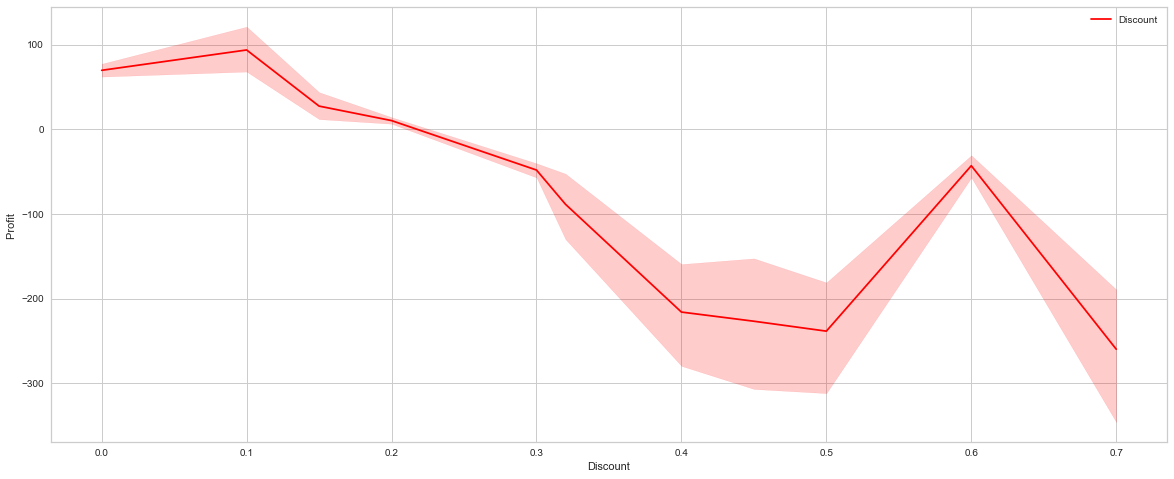

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot('Discount','Profit ', data=data[data['Category']=="Furniture"] , color='red',label='Discount')
plt.legend()
plt.show()

#### Office Supplies

/Users/yury/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


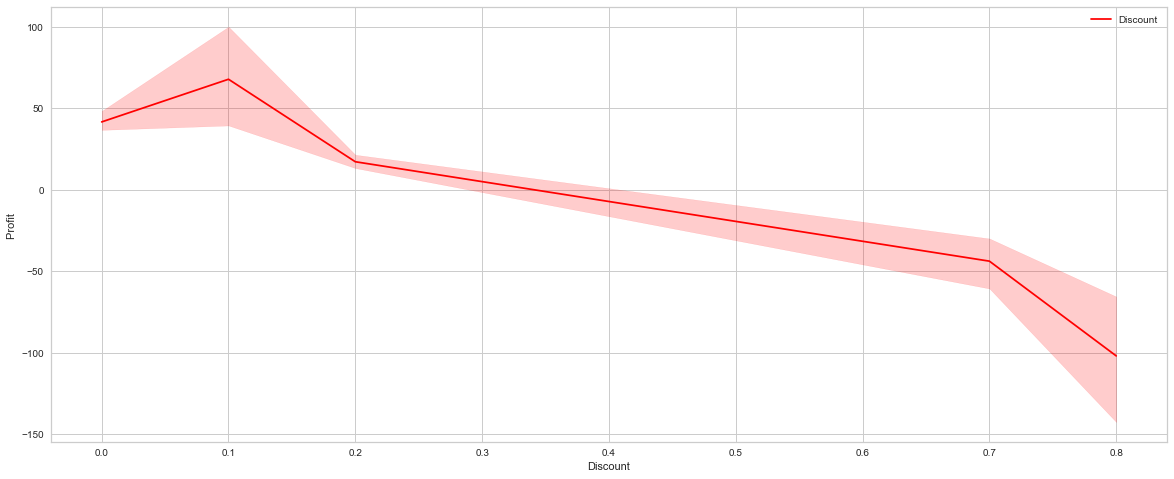

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot('Discount','Profit ', data=data[data['Category']=="Office Supplies"] , color='red',label='Discount')
plt.legend()
plt.show()

#### Technology

/Users/yury/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


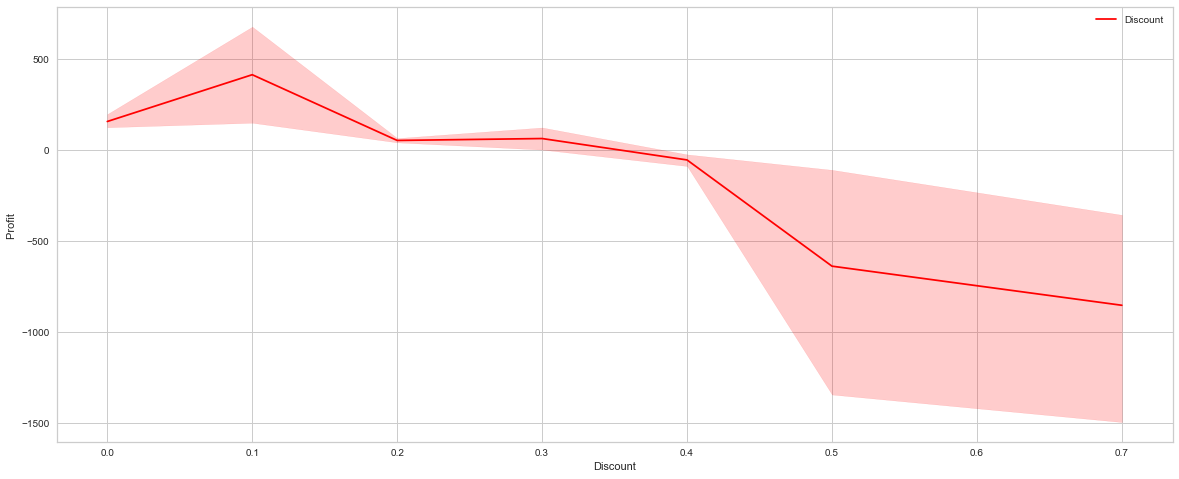

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot('Discount','Profit ', data=data[data['Category']=="Technology"] , color='red',label='Discount')
plt.legend()
plt.show()

**Summary**

If company use discount for Furniture it is better to not go over 23% discount, for Office Supplies it is better to not go over 35% discount and for Technology it is better to not go over 35% discount.Otherwise, company may lose money using hihger discounts

## Usage of Discount for each Sub-Category (Profit and Total transaction)

### Without any discount

In [ ]:
sales_no_discount = pd.pivot_table(data[data['Discount'] ==0],\
                       index = "Sub-Category",\
                       values='Profit ',\
                       aggfunc=["sum","count"]).reset_index()
sales_no_discount.columns = ['Sub-Category','Total_profit','total_transactions']

In [ ]:
display(sales_no_discount.sort_values(by=["total_transactions"],ascending=False))
display(f'Total Sales ${round(sales_no_discount["Total_profit"].sum(),2):,}')
display(f'Total Transactions {round(sales_no_discount["total_transactions"].sum()):,}')

,Sub-Category,Total_profit,total_transactions
12,Paper,25329.4677,857
9,Furnishings,16847.9689,571
14,Storage,25528.1715,530
2,Art,5380.6006,498
0,Accessories,35289.2539,471
3,Binders,39314.4507,337
13,Phones,34365.2093,311
1,Appliances,23183.7361,271
10,Labels,4422.0960,239
7,Envelopes,4976.9844,152


'Total Sales $320,987.6'

'Total Transactions 4,798'

**Summary**

This report provides information on the sales and profits of various product categories. The data shows that paper is the top-selling category with 857 units **sold, followed by furnishings, storage, and art**.**Binders, phones, appliances, labels, envelopes, chairs, and fasteners** are also popular categories.Top selling product is **Binders**. **Machines and copiers** are the least sold categories. The total number of units sold is 4798, and the total profit generated is $320,987.

### With discount that used no more than 25%

In [ ]:
sales_with_discount_less_25 = pd.pivot_table(data[(data['Discount'] <= 0.25) & (data['Discount'] > 0)],\
                       index = "Sub-Category",\
                       values='Profit ',\
                       aggfunc=["sum","count"]).reset_index()
sales_with_discount_less_25.columns = ['Sub-Category','Total_profit','total_transactions']

In [ ]:
display(sales_with_discount_less_25.sort_values(by=["total_transactions"],ascending=False))
display(f'Total Sales ${round(sales_with_discount_less_25["Total_profit"].sum(),2):,}')
display(f'Total Transactions {round(sales_with_discount_less_25["total_transactions"].sum()):,}')

,Sub-Category,Total_profit,total_transactions
3,Binders,29417.8090,573
12,Paper,8724.1016,513
13,Phones,16536.3067,469
5,Chairs,11394.1869,326
14,Storage,-4249.3451,316
0,Accessories,6647.3818,304
2,Art,1147.1864,298
9,Furnishings,2155.8299,248
1,Appliances,3583.9105,128
10,Labels,1124.1580,125


'Total Sales $100,785.47'

'Total Transactions 3,803'

### Mean avarage of discount and total Transaction of each subcatery (Discount < 25%)

In [ ]:
data[(data['Sub-Category'].\
      isin(['Supplies','Tables','Storage'])) &\
     ((data['Discount'] <= 0.25) & (data['Discount'] > 0))].groupby('Sub-Category')['Discount'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub-Category,,,,,,,,
Storage,316.0,0.2,1.111984e-15,0.2,0.2,0.2,0.2,0.2
Supplies,73.0,0.2,2.794766e-16,0.2,0.2,0.2,0.2,0.2
Tables,71.0,0.2,2.795313e-16,0.2,0.2,0.2,0.2,0.2


**Summary**

This report provides information on the sales and profits of various sub-categories of products. The data shows that **Binders** are the top-selling sub-category with **573** units sold, followed by **paper, phones, chairs, and storage**. **Accessories, art, and furnishings** are also popular sub-categories. **Machines and copiers** are the least sold sub-categories. The total number of units sold is 3,803, and the total profit generated is $100,785. In addition it can be seen that usage of discount on Storage, Supplies and Tables does not give any profit and company lose money.

### With discount that used more than 25%

In [ ]:
sales_with_discount_more_25 = pd.pivot_table(data[data['Discount'] > 0.25],\
                       index = "Sub-Category",\
                       values='Profit ',\
                       aggfunc=["sum","count"]).reset_index()
sales_with_discount_more_25.columns = ['Sub-Category','Total_profit','total_transactions']

In [ ]:
display(sales_with_discount_more_25.sort_values(by=["total_transactions"],ascending=False))
display(f'Total Sales ${round(sales_with_discount_more_25["Total_profit"].sum(),2):,}')
display(f'Total Transactions {round(sales_with_discount_more_25["total_transactions"].sum()):,}')

,Sub-Category,Total_profit,total_transactions
1,Binders,-38510.4964,613
8,Tables,-30698.2228,176
3,Chairs,-6737.1167,158
5,Furnishings,-5944.6552,138
7,Phones,-6385.7854,109
2,Bookcases,-11097.7614,70
0,Appliances,-8629.6412,67
6,Machines,-29555.3521,53
4,Copiers,2182.9752,9


'Total Sales $-135,376.06'

'Total Transactions 1,393'

#### Mean avarage of discount and total Transaction of each subcatery (Discount > 25%)

In [ ]:
data[data['Discount'] > 0.25].groupby('Sub-Category')['Discount'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub-Category,,,,,,,,
Appliances,67.0,0.800000,1.006742e-15,0.8,0.80,0.80,0.80,0.8
Binders,613.0,0.738010,4.858070e-02,0.7,0.70,0.70,0.80,0.8
Bookcases,70.0,0.444857,1.551973e-01,0.3,0.32,0.32,0.50,0.7
Chairs,158.0,0.300000,5.568766e-16,0.3,0.30,0.30,0.30,0.3
Copiers,9.0,0.400000,5.887847e-17,0.4,0.40,0.40,0.40,0.4
Furnishings,138.0,0.600000,5.571338e-16,0.6,0.60,0.60,0.60,0.6
Machines,53.0,0.543396,1.487246e-01,0.3,0.40,0.50,0.70,0.7
Phones,109.0,0.400000,8.365133e-16,0.4,0.40,0.40,0.40,0.4
Tables,176.0,0.392898,7.245184e-02,0.3,0.30,0.40,0.45,0.5


**Summary**


The report shows that **Binders** have the highest negative profit with **-38,499.217** and the highest number of transactions with **613**, Tables have the seocnd-highest negative profit with **-40,698.2228** and **176 transaction**.

**Copers** are the only sub category with **2,182**, but the have the lowest number of transactions and used only 40% discount on their products. The total loss for all sub-categories is **-135,376** with a total of **1,393 transactions**.

## Profit,Total Transactions and mean Discount per City

In [ ]:
table = pd.pivot_table(data,\
                       index = "City",\
                       values='Profit ',\
                       aggfunc=["sum","count"]).reset_index()

table_discont_mean = pd.pivot_table(data,\
                       index = "City",\
                       values='Discount',\
                       aggfunc=["mean"]).reset_index()

table_discont_mean.columns = ["City","mean_discount"]
table.columns =["City","sum","count"]
final_result = table.merge(table_discont_mean,on='City', how="left")

In [ ]:
final_result

,City,sum,count,mean_discount
0,Aberdeen,6.6300,1,0.000000
1,Abilene,-3.7584,1,0.800000
2,Akron,-186.6356,21,0.357143
3,Albuquerque,634.0881,14,0.057143
4,Alexandria,318.6183,16,0.000000
...,...,...,...,...
526,Woonsocket,78.6791,4,0.000000
527,Yonkers,2767.7557,15,0.066667
528,York,-102.1692,5,0.420000
529,Yucaipa,13.2080,1,0.000000


In [ ]:
final_result[["sum","count"]].describe()

,sum,count
count,531.000000,531.000000
mean,539.354090,18.821092
std,3676.603852,68.446757
min,-13837.767400,1.000000
25%,4.176100,2.500000
50%,73.352900,5.000000
75%,346.774250,12.000000
max,62036.983700,915.000000


**Summary**

* Avarage transaction per city is 18 and 540 $ per 1 shop
* The most negative sale was -13837. and the lowest transaction pre city was 1

### New Shops Analysis of profit with Discount usage > 25%

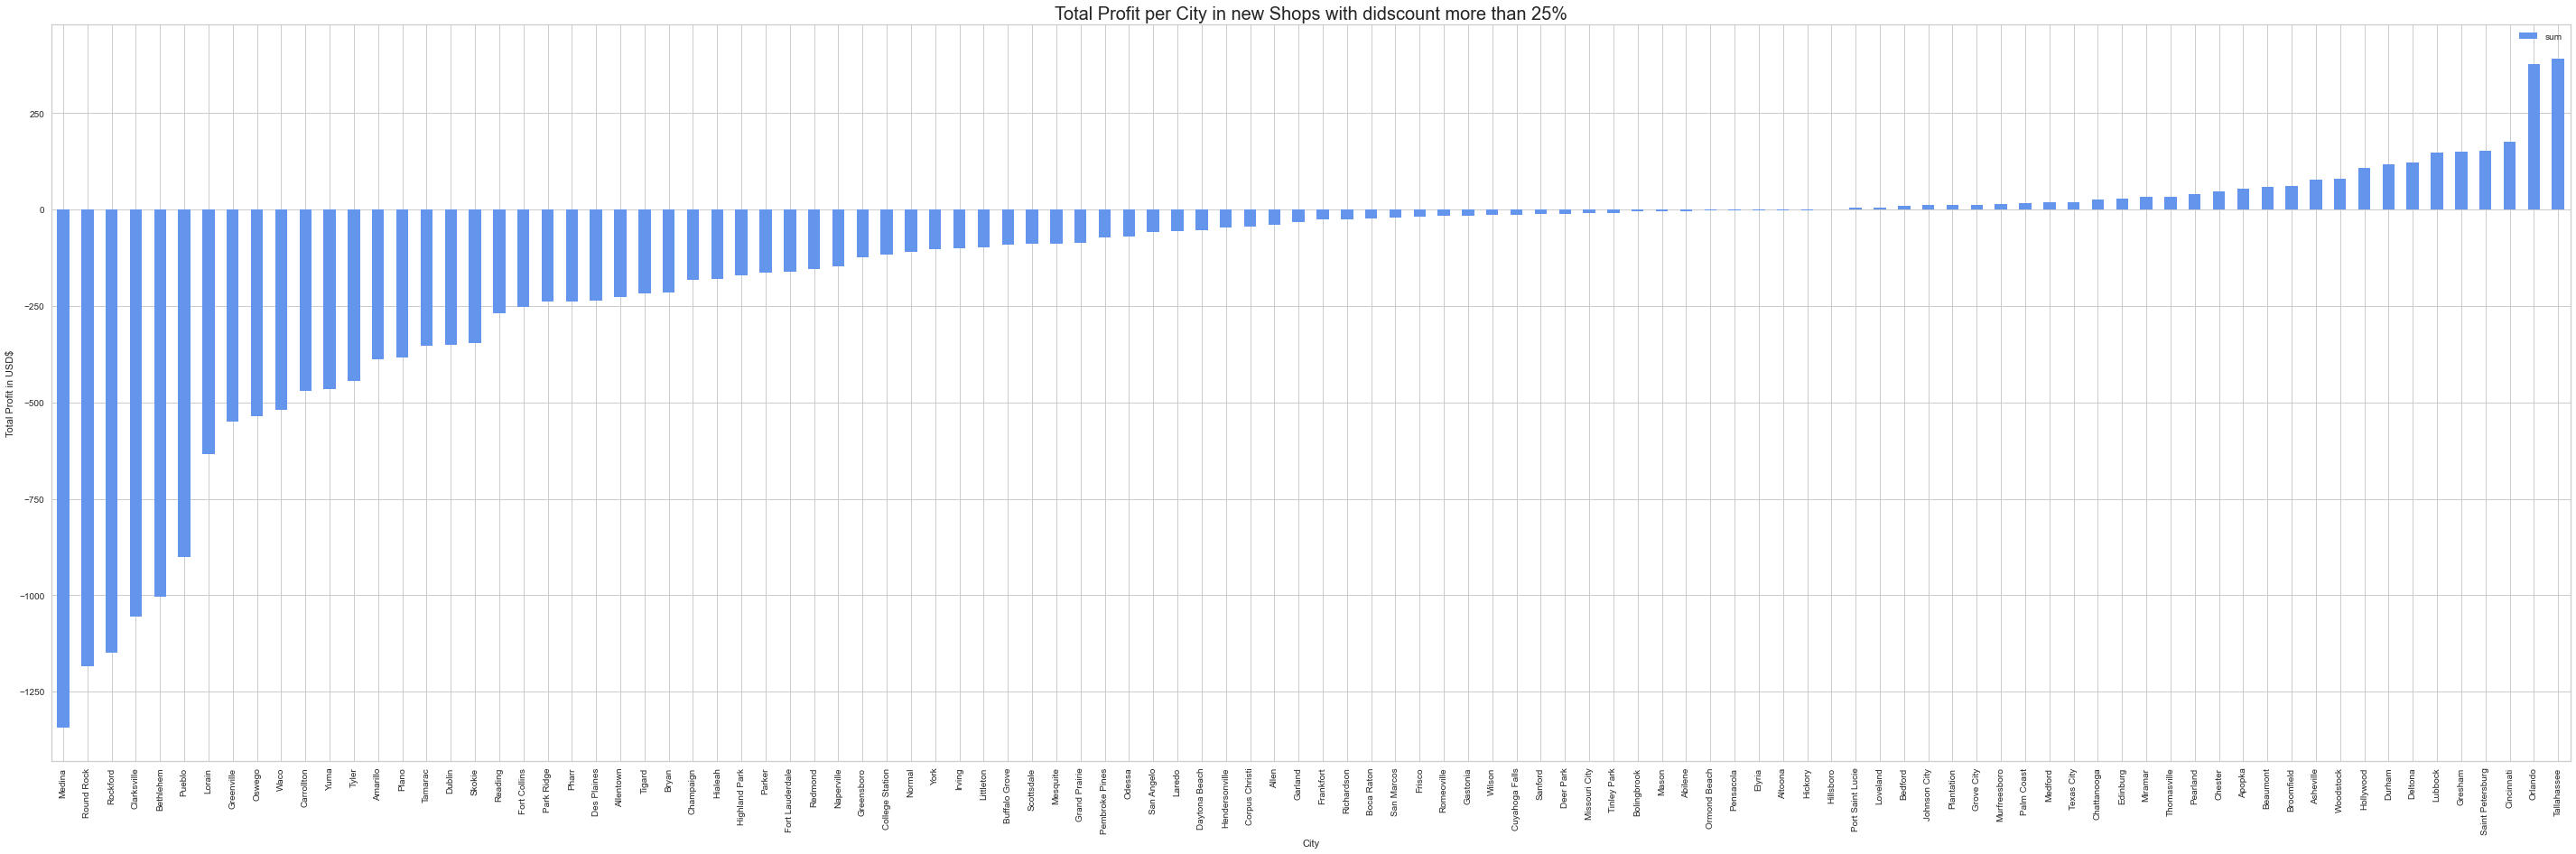

In [ ]:
#let assume that new shops have no more 18 transactions
df_state_sales = final_result[(final_result['count']<=18) & (final_result['mean_discount']>0.25)][["City","sum"]].sort_values(by="sum").plot.bar(x="City",y="sum",figsize = (50, 15),
                                                                                            color = 'Cornflowerblue')
plt.ylabel('Total Profit in USD$')
plt.xlabel('City')
plt.title('Total Profit per City in new Shops with didscount more than 25%', fontsize = 20)
plt.show()

In [ ]:
display(f'New shops with negative profit {final_result[(final_result["count"]<=18) & (final_result["mean_discount"]>0.25) & (final_result["sum"]<0)]["City"].count()}')
display(f'New shops with positive profit {final_result[(final_result["count"]<=18) & (final_result["mean_discount"]>0.25) & (final_result["sum"]>0)]["City"].count()}')

'New shops with negative profit 73'

'New shops with positive profit 31'

In [ ]:
display(f'New shops with negative profit mean per each shop {final_result[(final_result["count"]<=18) & (final_result["mean_discount"]>0.25) & (final_result["sum"]<0)]["sum"].median()}')
display(f'New shops with positive profit mean per each shop {final_result[(final_result["count"]<=18) & (final_result["mean_discount"]>0.25) & (final_result["sum"]>0)]["sum"].median()}')

'New shops with negative profit mean per each shop -102.16919999999999'

'New shops with positive profit mean per each shop 39.4131'

**Summary**
* Most of the new shops losing money (70%) with -102 dollars per shop
* While only 30 % earn only 40 dollars per shop
* top 3 cities with lowest profit Medina, Round Rock, RockFord
* top 3 cities with highest profit Tollahessee, Orlando, Cincinatti

### New Shops Analysis of profit with Discount usage < 25%

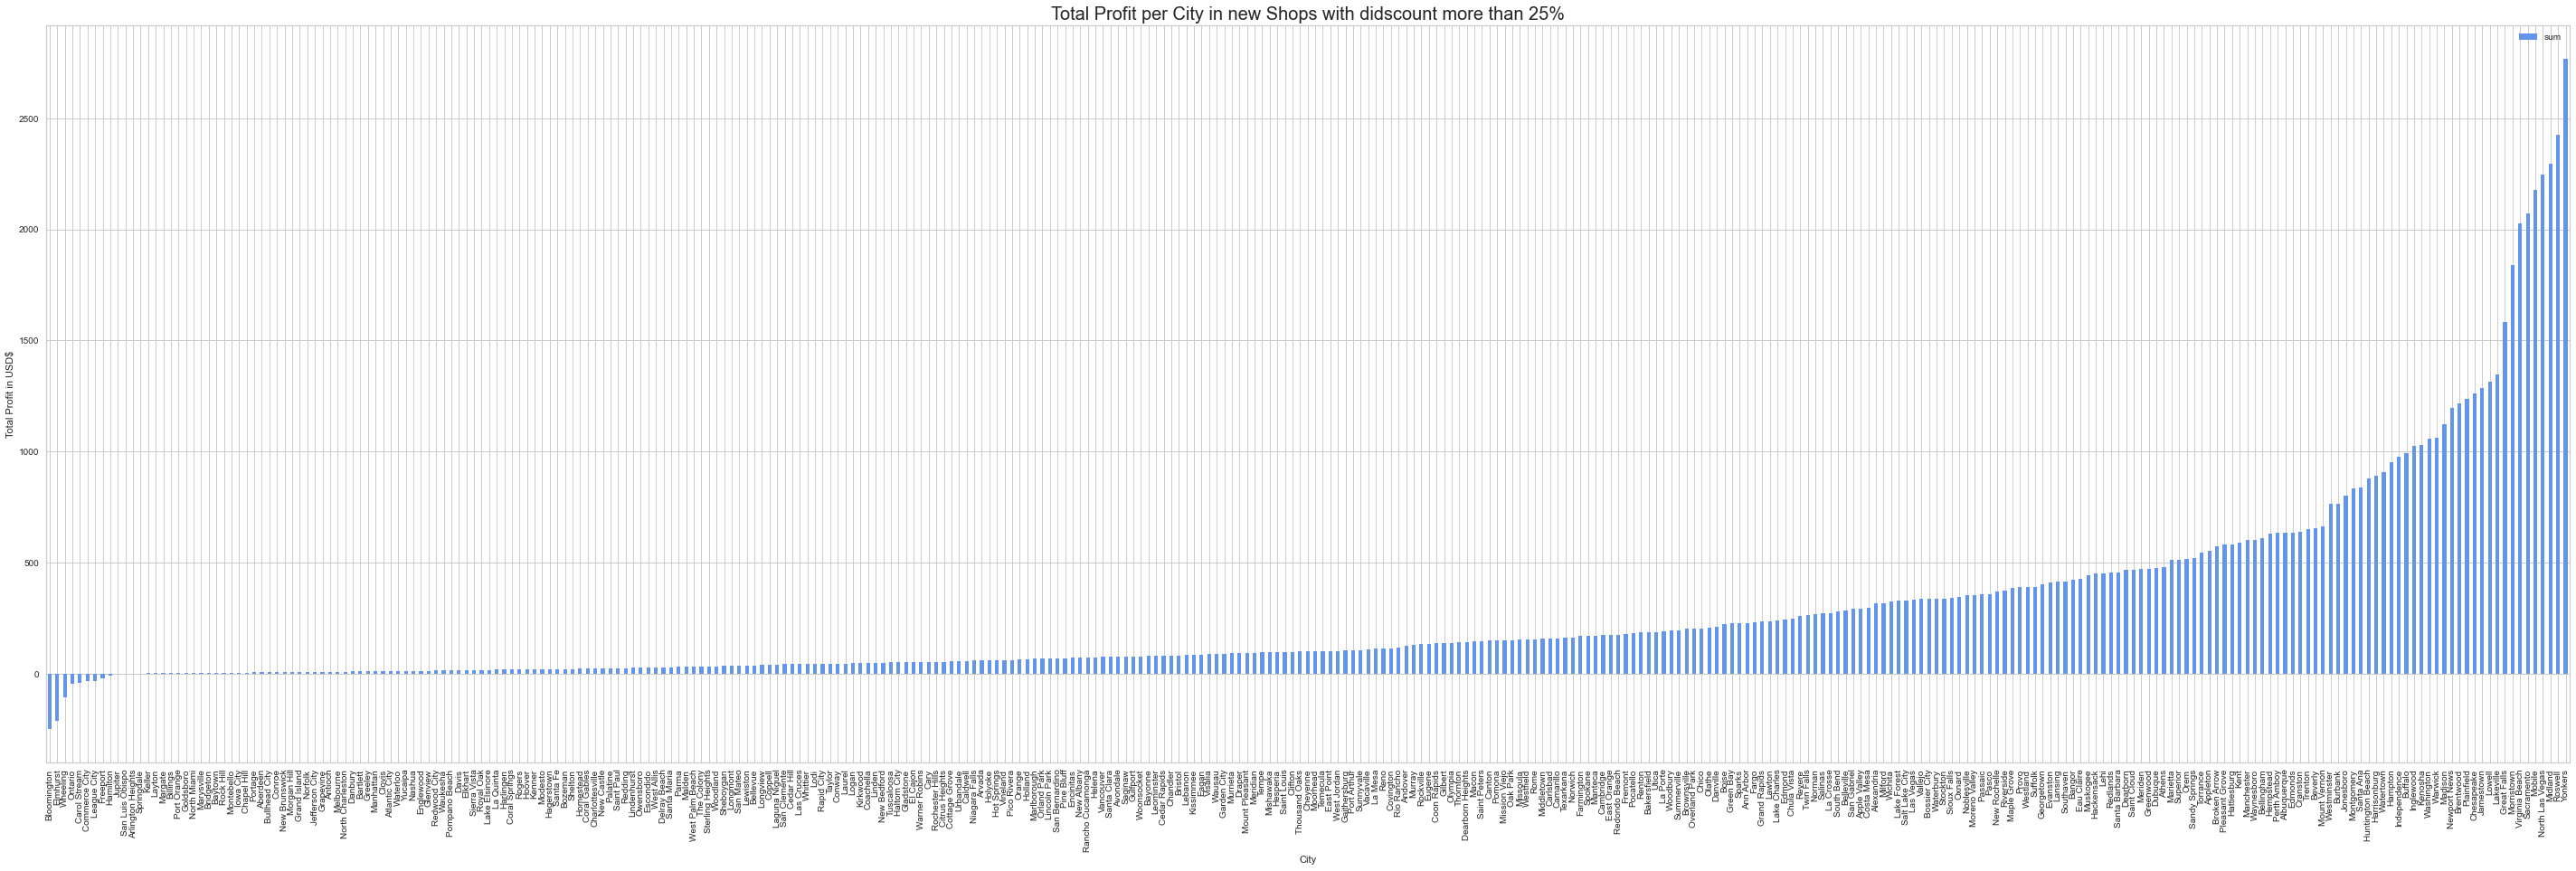

In [ ]:
#let assume that new shops have no more 18 transactions
df_state_sales = final_result[(final_result['count']<=18) & (final_result['mean_discount']<0.25)][["City","sum"]].sort_values(by="sum").plot.bar(x="City",y="sum",figsize = (50, 15),
                                                                                            color = 'Cornflowerblue')
plt.ylabel('Total Profit in USD$')
plt.xlabel('City')
plt.title('Total Profit per City in new Shops with didscount more than 25%', fontsize = 20)
plt.show()

In [ ]:
display(f'New shops with negative profit {final_result[(final_result["count"]<=18) & (final_result["mean_discount"]<0.25) & (final_result["sum"]<0)]["City"].count()}')
display(f'New shops with positive profit {final_result[(final_result["count"]<=18) & (final_result["mean_discount"]<0.25) & (final_result["sum"]>0)]["City"].count()}')

'New shops with negative profit 9'

'New shops with positive profit 324'

In [ ]:
display(f'New shops with negative profit mean per each shop {final_result[(final_result["count"]<=18) & (final_result["mean_discount"]<0.25) & (final_result["sum"]<0)]["sum"].median()}')
display(f'New shops with positive profit mean per each shop {final_result[(final_result["count"]<=18) & (final_result["mean_discount"]<0.25) & (final_result["sum"]>0)]["sum"].median()}')

'New shops with negative profit mean per each shop -39.8683'

'New shops with positive profit mean per each shop 104.10665'

**Summary**
* Most of the new shops earn money (97%) with 104 dollars per shop
* While only 3 % earn only -40 dollars per shop
* top 3 cities with lowest profit Bloomington, Elmhusrt, Wheeling
* top 3 cities with highest profit Yonkers, Roswell, Midland

In [ ]:
new_shops = final_result[final_result['count']<=18]["count"].count()
old_shops = final_result[final_result['count']>18]["count"].count()

In [ ]:
display(f'New Shops: {new_shops}')
display(f'Old Shops: {old_shops}')

'New Shops: 442'

'Old Shops: 89'

### Old Shops Analysis of profit with Discount usage > 25%

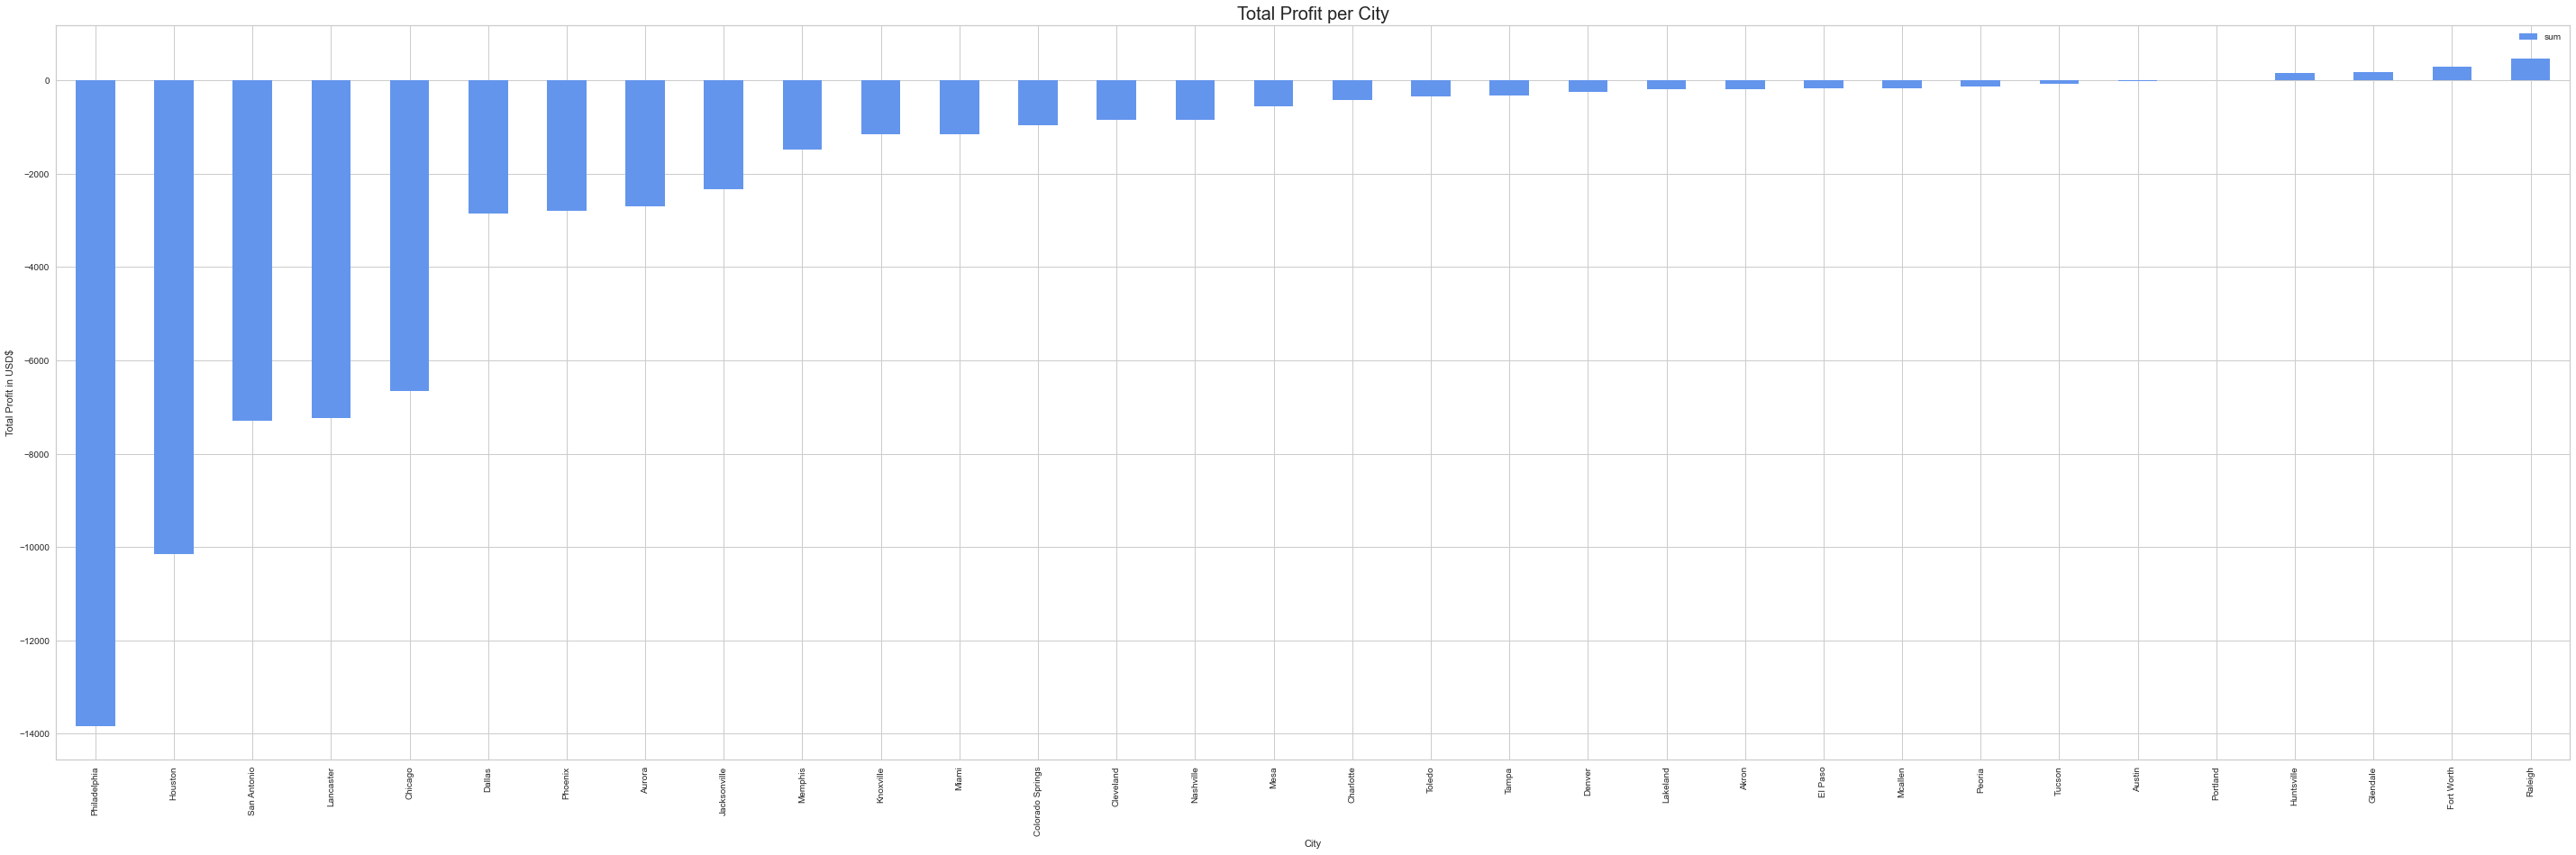

In [ ]:
#let assume that old shops have more than 18 transactions
df_state_sales = final_result[(final_result['count']>18) & (final_result['mean_discount']>0.25)][["City","sum"]].sort_values(by="sum").plot.bar(x="City",y="sum",figsize = (50, 15),
                                                                                            color = 'Cornflowerblue')
plt.ylabel('Total Profit in USD$')
plt.xlabel('City')
plt.title('Total Profit per City', fontsize = 20)
plt.show()

In [ ]:
display(f'New shops with negative profit {final_result[(final_result["count"]>18) & (final_result["mean_discount"]>0.25) & (final_result["sum"]<0)]["City"].count()}')
display(f'New shops with positive profit {final_result[(final_result["count"]>18) & (final_result["mean_discount"]>0.25) & (final_result["sum"]>0)]["City"].count()}')

'New shops with negative profit 27'

'New shops with positive profit 5'

In [ ]:
display(f'New shops with negative profit mean per each shop {final_result[(final_result["count"]>18) & (final_result["mean_discount"]>0.25) & (final_result["sum"]<0)]["sum"].median()}')
display(f'New shops with positive profit mean per each shop {final_result[(final_result["count"]>18) & (final_result["mean_discount"]>0.25) & (final_result["sum"]>0)]["sum"].median()}')

'New shops with negative profit mean per each shop -848.0079000000001'

'New shops with positive profit mean per each shop 182.8598'

**Summary**
* Most of the old shops earn negative profit (84%) with -814 dollars per shop
* While only 16 % gets positive profit with 182 dollars per shop
* top 3 cities with lowest profit philadelphia (almost -14k dollars), houston (almost -10k dollars), San Antonia (almost -8k dollars)
* top 3 cities with highest profit Raleigh(472 dollars), Fort Worth (300 dollars), Glendale (182 dollars)

### Old Shops Analysis of profit with Discount usage < 25%

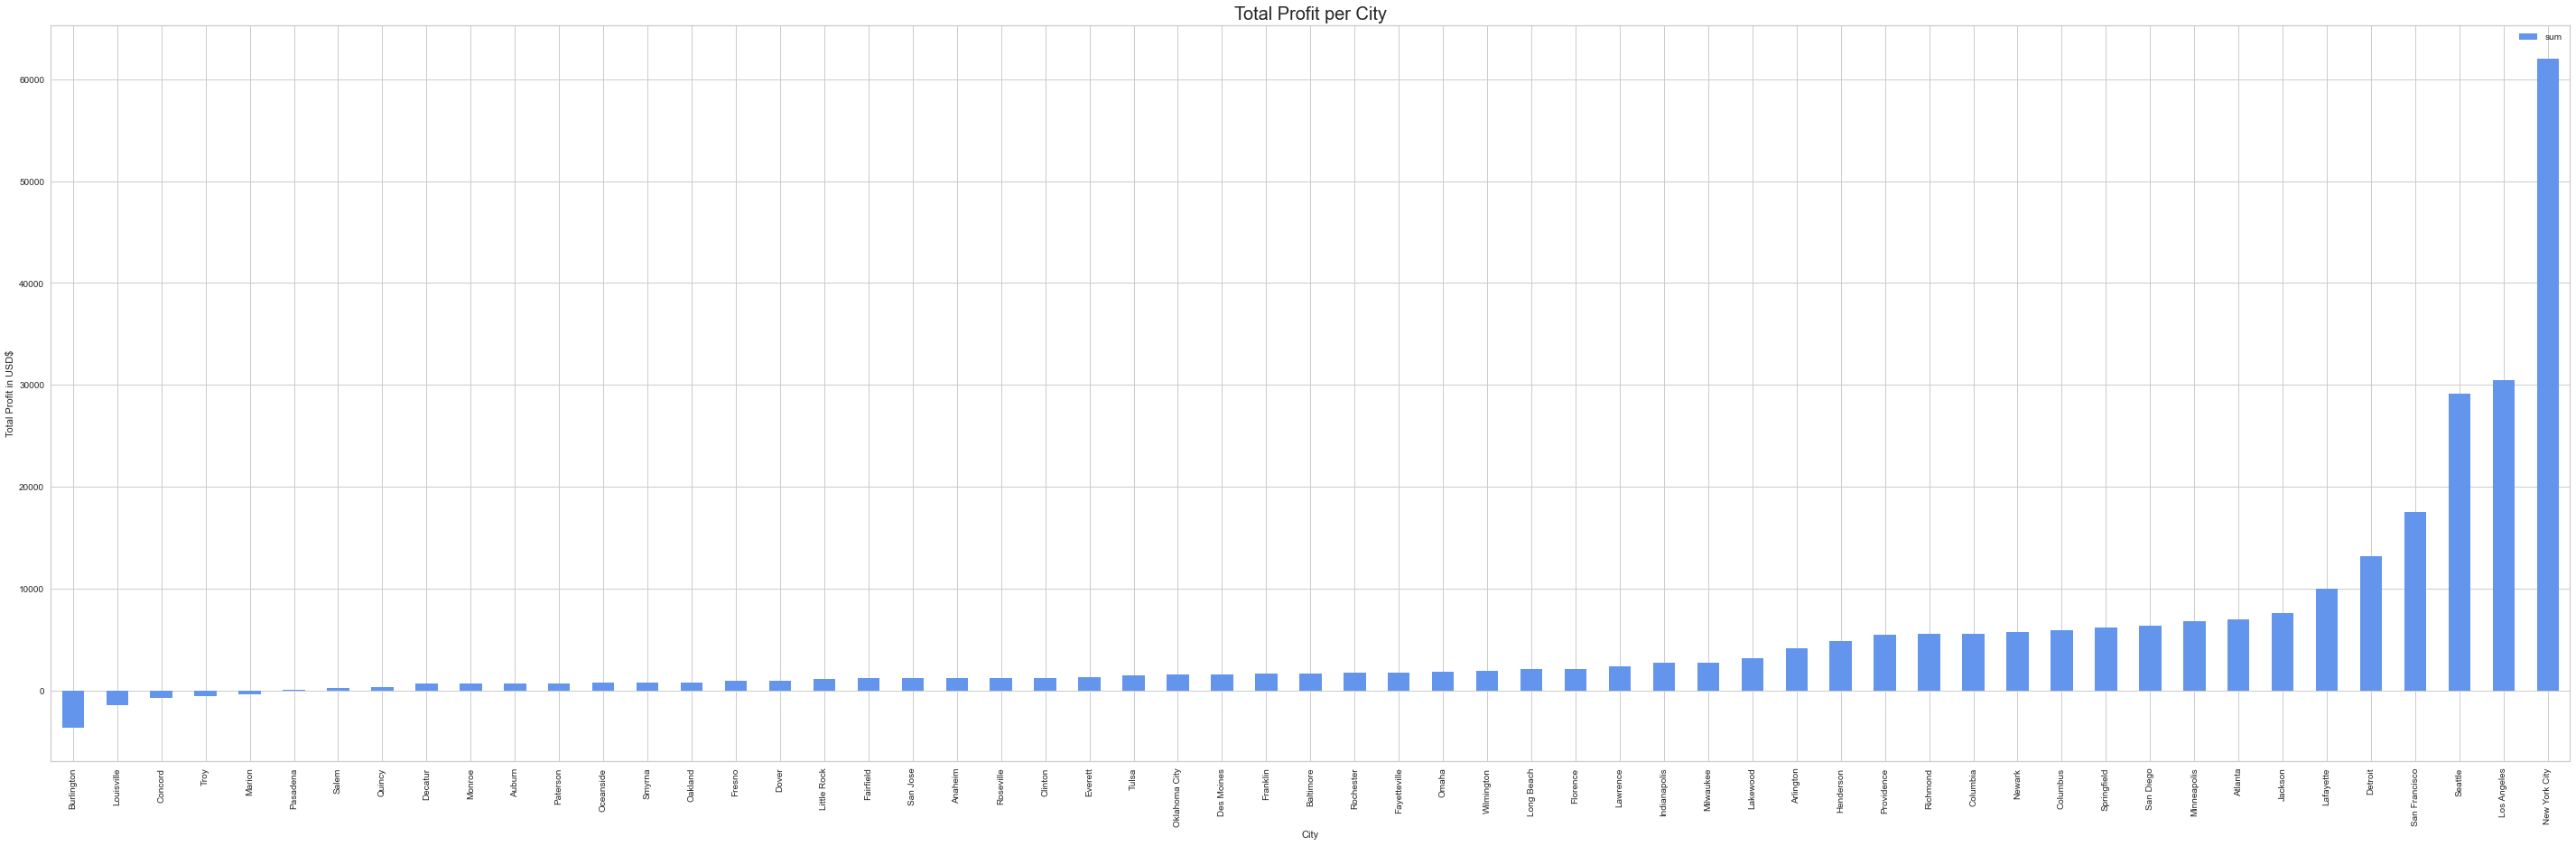

In [ ]:
#let assume that old shops have more than 18 transactions
df_state_sales = final_result[(final_result['count']>18) & (final_result['mean_discount']<0.25)][["City","sum"]].sort_values(by="sum").plot.bar(x="City",y="sum",figsize = (50, 15),
                                                                                            color = 'Cornflowerblue')
plt.ylabel('Total Profit in USD$')
plt.xlabel('City')
plt.title('Total Profit per City', fontsize = 20)
plt.show()

In [ ]:
display(f'New shops with negative profit {final_result[(final_result["count"]>18) & (final_result["mean_discount"]<0.25) & (final_result["sum"]<0)]["City"].count()}')
display(f'New shops with positive profit {final_result[(final_result["count"]>18) & (final_result["mean_discount"]<0.25) & (final_result["sum"]>0)]["City"].count()}')

'New shops with negative profit 5'

'New shops with positive profit 52'

In [ ]:
display(f'New shops with negative profit mean per each shop {final_result[(final_result["count"]>18) & (final_result["mean_discount"]<0.25) & (final_result["sum"]<0)]["sum"].median()}')
display(f'New shops with positive profit mean per each shop {final_result[(final_result["count"]>18) & (final_result["mean_discount"]<0.25) & (final_result["sum"]>0)]["sum"].median()}')

'New shops with negative profit mean per each shop -718.6388999999999'

'New shops with positive profit mean per each shop 1830.1480000000001'

In [ ]:
final_result[(final_result["count"]>18) & (final_result["mean_discount"]<0.25) & (final_result["sum"]<0)].sort_values(by="sum")

,City,sum,count,mean_discount
60,Burlington,-3622.8772,25,0.136000
267,Louisville,-1430.3129,57,0.142105
96,Concord,-718.6389,31,0.088710
488,Troy,-544.1518,29,0.227586
281,Marion,-380.3623,20,0.175000


**Summary**
* Most of the old shops earn positive profit (91%) with 1830 dollars per shop
* While only 9 % gets negative profit with -718 dollars per shop
* top 3 cities with lowest profit Burlington (-3.6k dollars), Louisville (almost 1.4k dollars), Concord (-718 dollars)
* top 3 cities with highest profit New York City(62k dollars), Los Angeles(30k dollars), Seattle (29k dollars)

It is recommended to not use discount for those 5 cities as it does not benefit them
* Burlington, Louisville, Concord, Troy, Marion

# General overview of Sales in Cities with/without discount

### Profit of all Cities who use discount less than 25% and not 0%

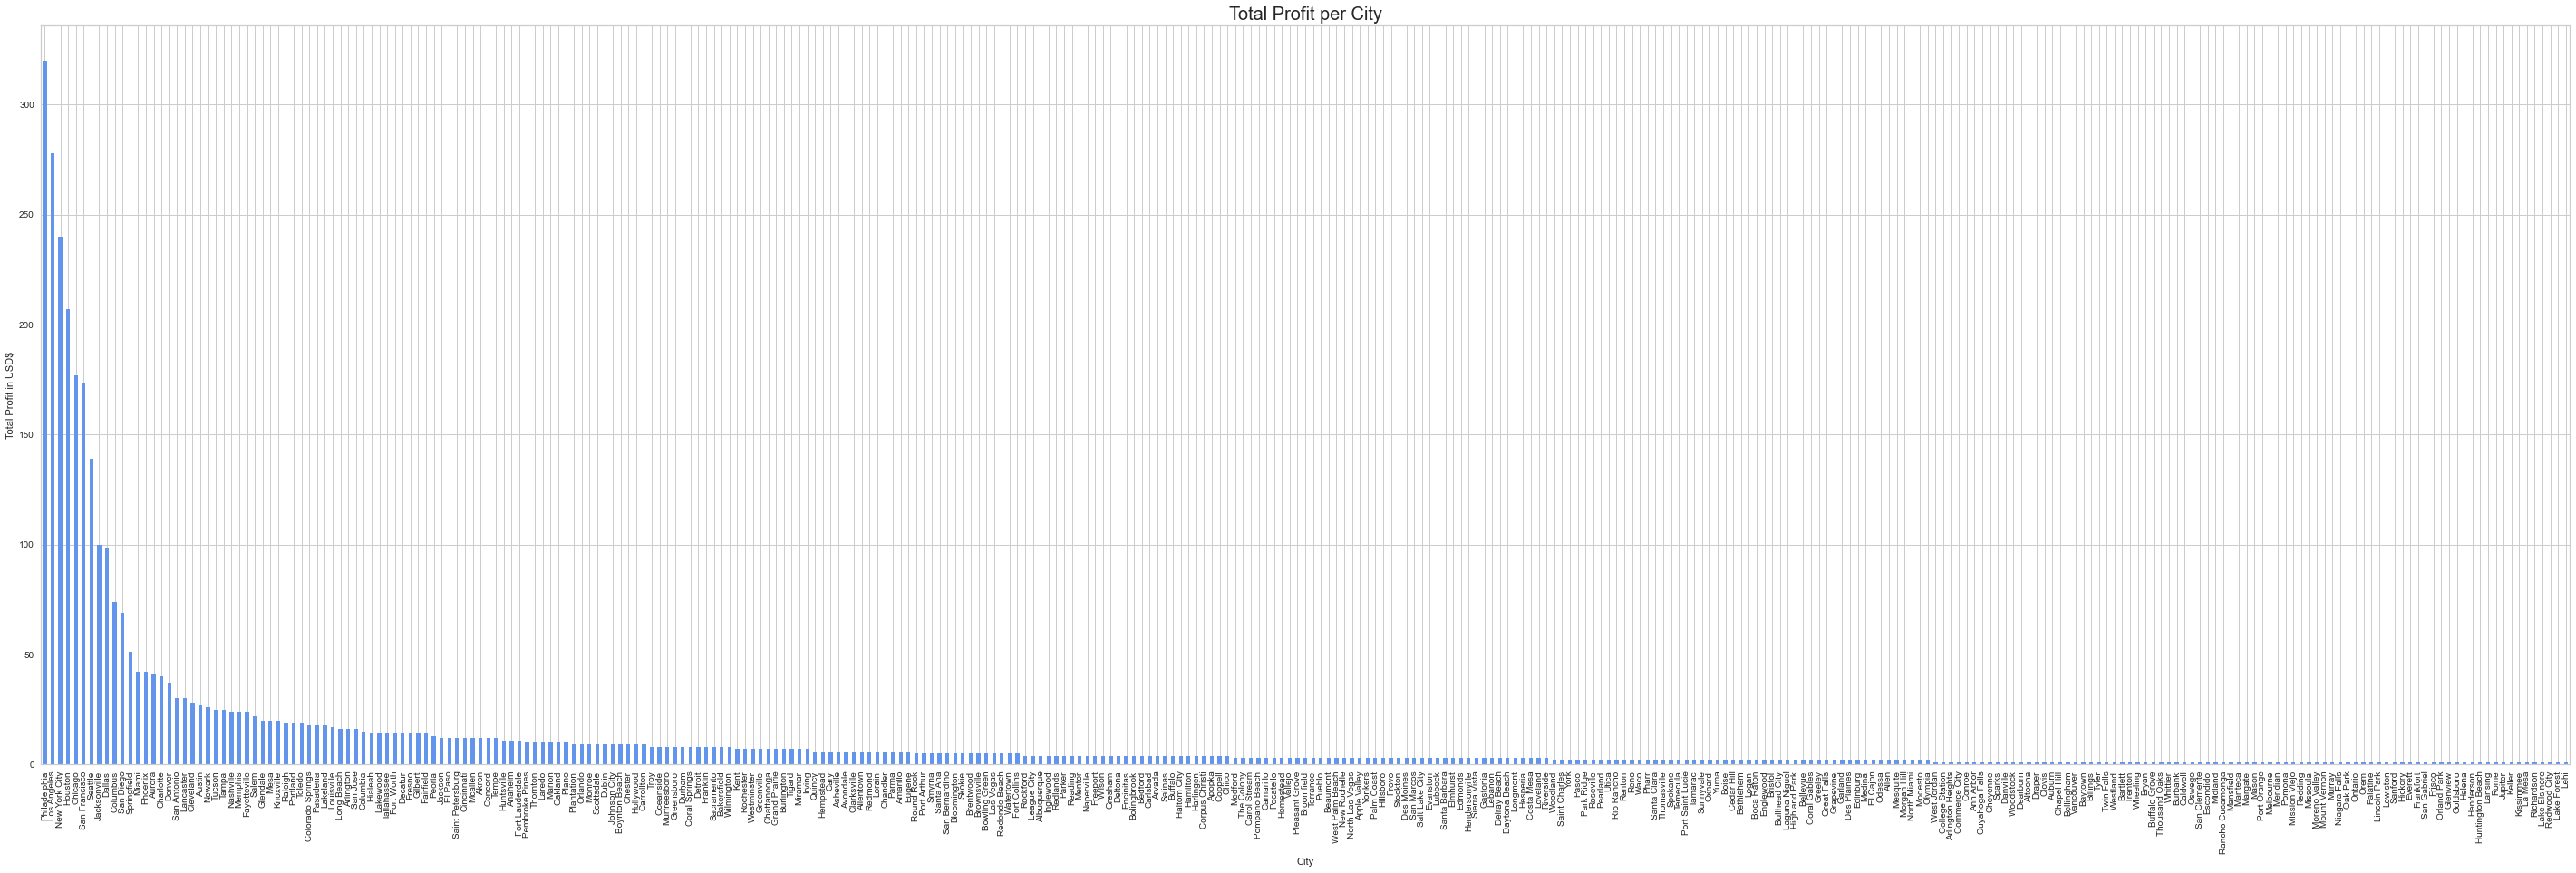

In [ ]:
# total Sales for each State with no more disocunt than 25 %
df_state_sales = data[(data['Discount'] <= 0.25) & (data['Discount'] != 0)].groupby('City')['Profit '].count().sort_values(ascending = False).plot.bar(figsize = (50, 15),
                                                                                            color = 'Cornflowerblue')

plt.ylabel('Total Profit in USD$')
plt.xlabel('City')
plt.title('Total Profit per City', fontsize = 20)
plt.show()

**Summary**
As it can be seen most cities gain valuable profit, thus it beneficial for them to keep using discount but not more than 25 %

### Profit of all Cities who use discount more than 25%

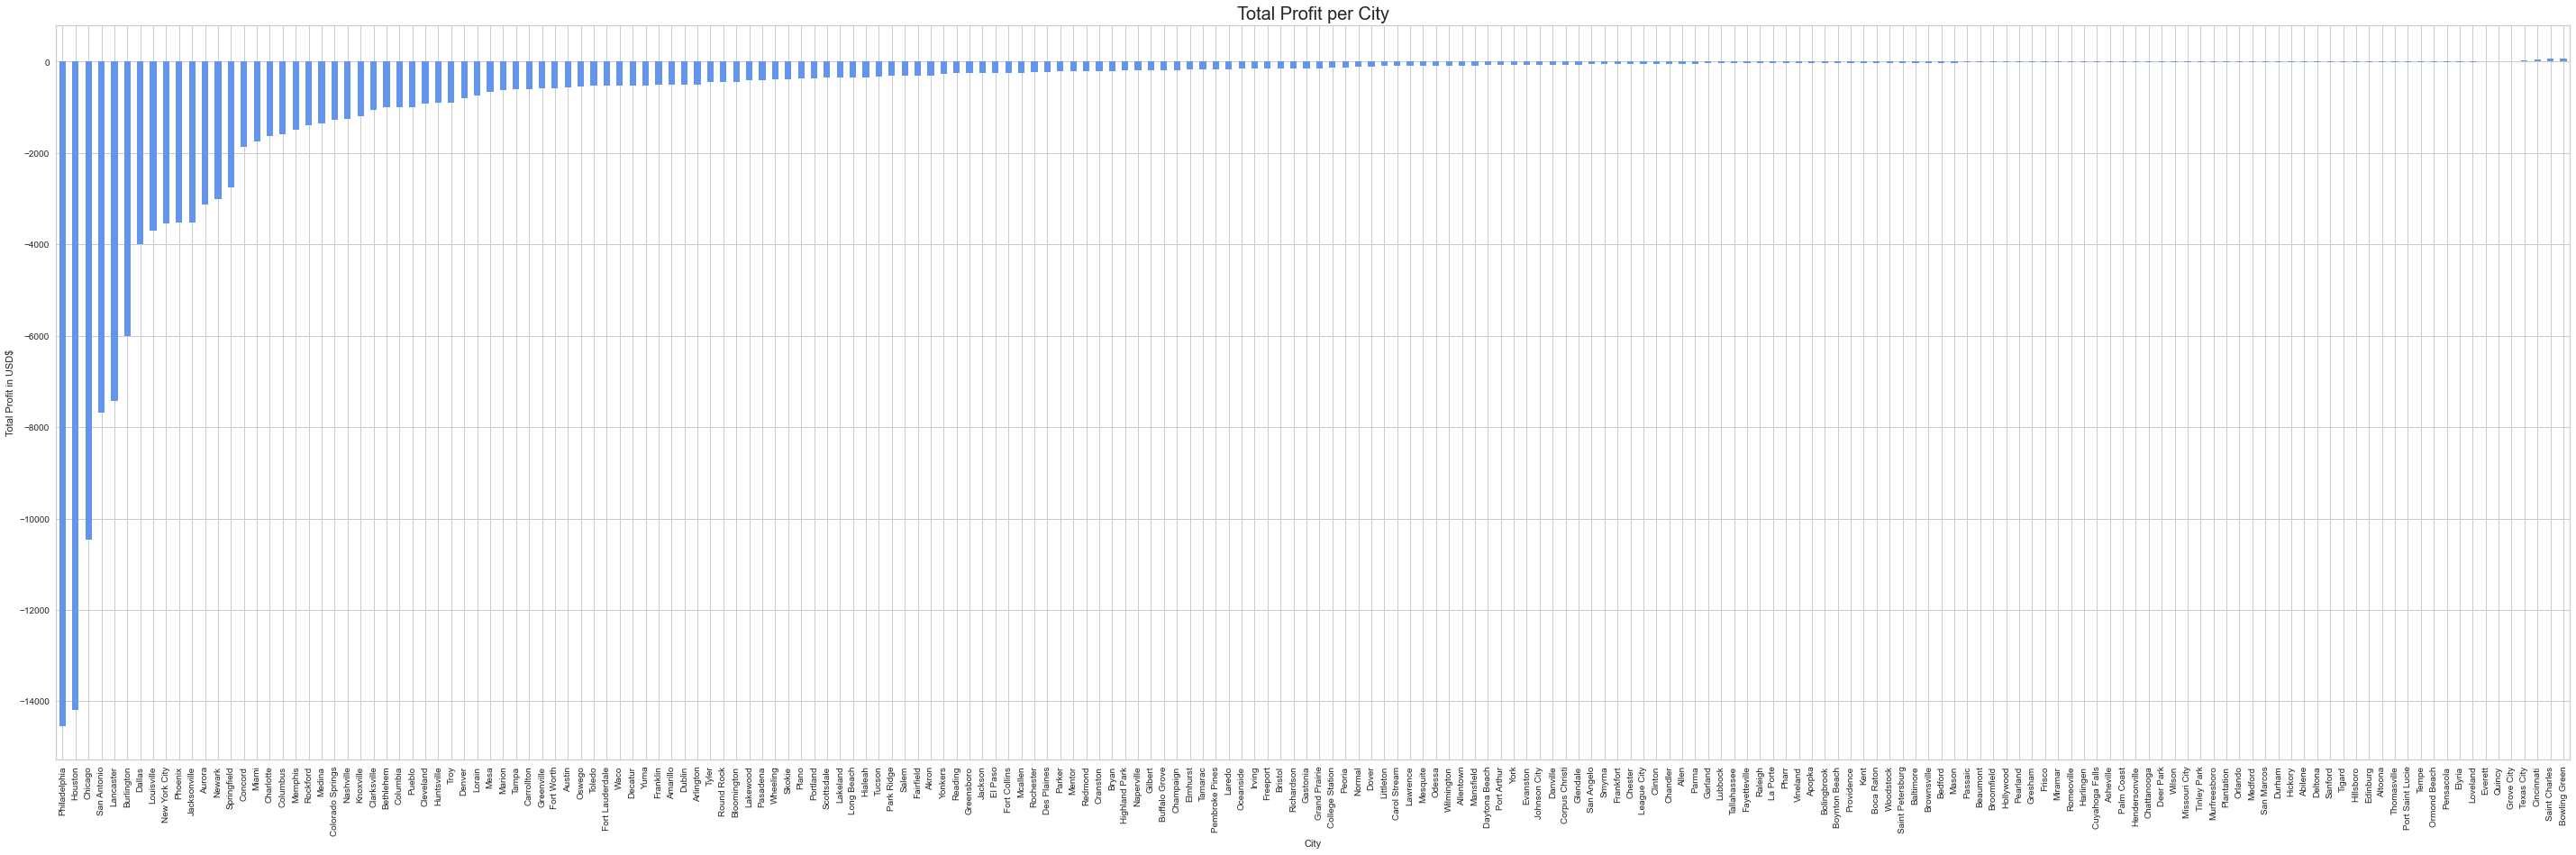

In [ ]:
# total Sales for each State with  more disocunt than 25 %
df_state_sales = data[(data['Discount'] > 0.25)].groupby('City')['Profit '].sum().sort_values(ascending = True).plot.bar(figsize = (50, 15),
                                                                                            color = 'Cornflowerblue')
plt.ylabel('Total Profit in USD$')
plt.xlabel('City')
plt.title('Total Profit per City', fontsize = 20)
plt.show()

In [ ]:
display(final_result.sort_values(by=["sum"],ascending=False).head(10))
display(final_result.sort_values(by=["sum"],ascending=True).head(10))

,City,sum,count,mean_discount
329,New York City,62004.5903,906,0.056291
266,Los Angeles,30308.4841,734,0.074796
452,Seattle,29121.6825,424,0.065566
438,San Francisco,17482.9366,503,0.067296
123,Detroit,13146.6935,114,0.007018
233,Lafayette,10018.3876,31,0.000000
215,Jackson,7581.6828,82,0.030488
21,Atlanta,6993.6629,39,0.000000
300,Minneapolis,6824.5846,23,0.000000
437,San Diego,6368.5020,169,0.080473


,City,sum,count,mean_discount
374,Philadelphia,-13869.1219,531,0.328249
207,Houston,-10175.6309,373,0.380000
434,San Antonio,-7299.0502,59,0.383051
241,Lancaster,-7239.0684,46,0.315217
80,Chicago,-6639.9794,312,0.383013
60,Burlington,-3622.8772,25,0.136000
109,Dallas,-2848.2505,156,0.359615
375,Phoenix,-2790.8832,63,0.353968
24,Aurora,-2691.7386,68,0.352941
216,Jacksonville,-2323.8350,125,0.286800


### Summary

Generally, the store appears to frequently utilize promotional discounts. However, this approach seems to result in significant losses. If stores with fewer than 18 transactions are relatively new, their high discounts could be an attempt to attract customers. However, this strategy may backfire, leading customers to question the reliability of the products.

Conversely, stores with more than 18 transactions persistently offer high discounts, continuing to operate at a loss. This pattern could suggest poor business management strategies within these stores.

Following a careful analysis, it is recommended that companies limit their discount rates to no more than 25% to safeguard profitability. For businesses seeking to increase customer traffic and sales, exploring alternative marketing strategies may prove more beneficial and financially sustainable.